<a href="https://colab.research.google.com/github/Igor-source/Diploma_demo/blob/main/%D0%A2%D0%BE%20%D1%87%D1%82%D0%BE%20%D1%81%D1%83%D1%81%D0%B0%D0%BD%20%D1%81%D0%BA%D0%B0%D1%87%D0%B0%D0%BB%20%D0%B8%20%D1%8F%20%D0%BF%D1%80%D0%BE%D0%B1%D1%83%D1%8E%20%D1%87%D0%B0%D1%81%D1%82%D1%8C%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install lazypredict optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 5.8 MB/s eta 0:00:00


In [2]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.2 MB/s eta 0:00:00


In [3]:
!pip install xgboost

In [4]:
!pip install rdkit-pypi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 20.5 MB/s eta 0:00:00


In [5]:
!pip install missingno

In [6]:
import pandas as pd
import numpy as np

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder

from rdkit.ML.Descriptors.MoleculeDescriptors import MolecularDescriptorCalculator
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
from sklearn.manifold import TSNE
from math import log

from sklearn.model_selection import train_test_split
import geopandas as gpd

import missingno

In [8]:
df_merged = pd.read_csv('/content/drive/MyDrive/Susan_project/CSV_for_diploma/df_filtered_final.csv')
df_merged.drop(columns=['Unnamed: 0'], inplace=True)
df_merged

,canonical_smiles,parent_molecule_chembl_id,standard_type,standard_units,standard_value,target_organism,target_tax_id,type,units,uo_units,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,value_in_ug_ml
0,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,CHEMBL53463,EC50,nM,3688.0,Streptococcus,1301.0,EC50,um,UO_0000065,...,0,0,0,0,0,0,0,0,0,2.138988
1,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,CHEMBL53463,EC50,nM,518.0,Streptococcus sp. 'group A',36470.0,EC50,um,UO_0000065,...,0,0,0,0,0,0,0,0,0,0.300433
2,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,CHEMBL53463,EC50,nM,1149.0,Streptococcus pyogenes serotype M1,301447.0,EC50,um,UO_0000065,...,0,0,0,0,0,0,0,0,0,0.666404
3,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,CHEMBL53463,MIC,nM,10000.0,Escherichia coli,562.0,MIC,uM,UO_0000065,...,0,0,0,0,0,0,0,0,0,5.799860
4,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,CHEMBL53463,MIC,nM,10000.0,Klebsiella pneumoniae,573.0,MIC,uM,UO_0000065,...,0,0,0,0,0,0,0,0,0,5.799860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63419,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,CHEMBL178,MIC,ug.mL-1,5.0,Staphylococcus epidermidis,1282.0,MIC,ug ml-1,UO_0000274,...,0,0,0,0,0,0,0,0,0,5.000000
63420,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,CHEMBL178,MIC,ug.mL-1,5.0,Streptococcus pyogenes,1314.0,MIC,ug ml-1,UO_0000274,...,0,0,0,0,0,0,0,0,0,5.000000
63421,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,CHEMBL178,MIC,ug.mL-1,5.0,Bacillus cereus,1396.0,MIC,ug ml-1,UO_0000274,...,0,0,0,0,0,0,0,0,0,5.000000
63422,COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@@](O)...,CHEMBL178,MIC,ug.mL-1,5.0,Bacillus subtilis,1423.0,MIC,ug ml-1,UO_0000274,...,0,0,0,0,0,0,0,0,0,5.000000


In [106]:
df_merged['target_organism'].nunique()

406

#Preparing data for model learning

In [9]:
df_learn = df_merged.copy()
df_learn.drop(columns=['canonical_smiles','parent_molecule_chembl_id','standard_value','type','units','uo_units','target_tax_id'], inplace=True)
df_learn

,standard_type,standard_units,target_organism,value,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,value_in_ug_ml
0,EC50,nM,Streptococcus,3.688,13.643057,-2.240737,13.643057,0.000000,0.227432,579.986,...,0,0,0,0,0,0,0,0,0,2.138988
1,EC50,nM,Streptococcus sp. 'group A',0.518,13.643057,-2.240737,13.643057,0.000000,0.227432,579.986,...,0,0,0,0,0,0,0,0,0,0.300433
2,EC50,nM,Streptococcus pyogenes serotype M1,1.149,13.643057,-2.240737,13.643057,0.000000,0.227432,579.986,...,0,0,0,0,0,0,0,0,0,0.666404
3,MIC,nM,Escherichia coli,10.000,13.643057,-2.240737,13.643057,0.000000,0.227432,579.986,...,0,0,0,0,0,0,0,0,0,5.799860
4,MIC,nM,Klebsiella pneumoniae,10.000,13.643057,-2.240737,13.643057,0.000000,0.227432,579.986,...,0,0,0,0,0,0,0,0,0,5.799860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63419,MIC,ug.mL-1,Staphylococcus epidermidis,5.000,13.629793,-1.999418,13.629793,0.014743,0.305129,527.526,...,0,0,0,0,0,0,0,0,0,5.000000
63420,MIC,ug.mL-1,Streptococcus pyogenes,5.000,13.629793,-1.999418,13.629793,0.014743,0.305129,527.526,...,0,0,0,0,0,0,0,0,0,5.000000
63421,MIC,ug.mL-1,Bacillus cereus,5.000,13.629793,-1.999418,13.629793,0.014743,0.305129,527.526,...,0,0,0,0,0,0,0,0,0,5.000000
63422,MIC,ug.mL-1,Bacillus subtilis,5.000,13.629793,-1.999418,13.629793,0.014743,0.305129,527.526,...,0,0,0,0,0,0,0,0,0,5.000000


##The detecting outliers in categorical data

In [10]:
def quartile_funct (data, quartile):
  q = data.quantile(quartile)
  return q

In [11]:

def histogram_plot (value_counts):

  # Построение столбчатой диаграммы
  plt.figure(figsize=(10, 5))
  value_counts.plot(kind='bar', color='skyblue', edgecolor='black')

  # Настройки графика
  plt.xlabel('Категории')
  plt.ylabel('Частота')
  plt.title('Распределение категориального признака')
  plt.xticks(rotation=45)  # Поворот подписей, если они длинные
  plt.grid(axis='y', linestyle='--', alpha=0.7)

  # Отображение графика
  plt.show()

  return value_counts

In [12]:
def iqr_funct(count_items):

  # IQR
  # Calculate the upper and lower limits
  Q1 = count_items.quantile(0.25)
  Q3 = count_items.quantile(0.75)
  IQR = Q3 - Q1
  lower = Q1 - 1.5*IQR
  upper = Q3 + 1.5*IQR

  # Create arrays of Boolean values indicating the outlier rows
  upper_array = np.where(count_items >= upper)[0]
  lower_array = np.where(count_items <= lower)[0]

  print("Upper outliers:")
  print(upper_array)
  print("Lower outliers:")
  print(lower_array)
  return upper_array, lower_array
# # Removing the outliers
# df_diabetes.drop(index=upper_array, inplace=True)
# df_diabetes.drop(index=lower_array, inplace=True)

# Print the new shape of the DataFrame
# print("New Shape: ", df_diabetes.shape)

###Standard_type

standard_type
MIC       49158
MIC90      5951
MIC50      5055
MBC        1306
IC50        800
MPC         370
MIC99       204
EC50        197
MBC90       146
MBC50       133
MIC>90      104
Name: count, dtype: int64


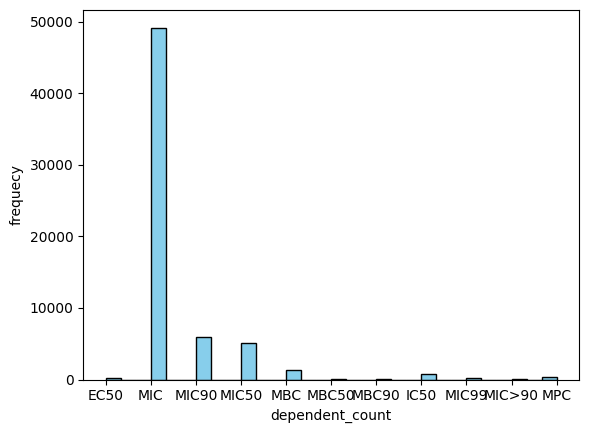

In [13]:
count_type = df_learn['standard_type'].value_counts()
# ax = category_counts.plot.hist(kde=True)
# Plotting a basic histogram
plt.hist(df_learn["standard_type"], bins=30, color='skyblue', edgecolor='black')
plt.ylabel("frequecy")
plt.xlabel("dependent_count")
print(count_type)

In [14]:
outliers_type = iqr_funct(count_type)

Upper outliers:
[0]
Lower outliers:
[]


In [15]:
# quart_type = quartile_funct(count_type,[0.1,0.9])
# quart_type

In [16]:
# # Оставляем только те категории, у которых частота >= 3
# filter_type = count_type[count_type >= 133]

# print(filter_type)

In [17]:
# plot_type = histogram_plot(filter_type)

###Standard_units

standard_units
ug.mL-1             57136
nM                   3835
ug ml-1              1741
10'-2 umol/ml         214
mg/L                  142
uM                    142
mg/ml                  40
10'-2micromol/ml       32
mM                     29
umol/ml                18
10'-2microM            16
10'-2umol              14
uL/ml                  13
mmol/ml                12
10'-2mmol/ml           12
10'-3micromol/ml       12
ppm                     8
umol/L                  5
ng/ml                   2
ug m1 l-1               1
Name: count, dtype: int64


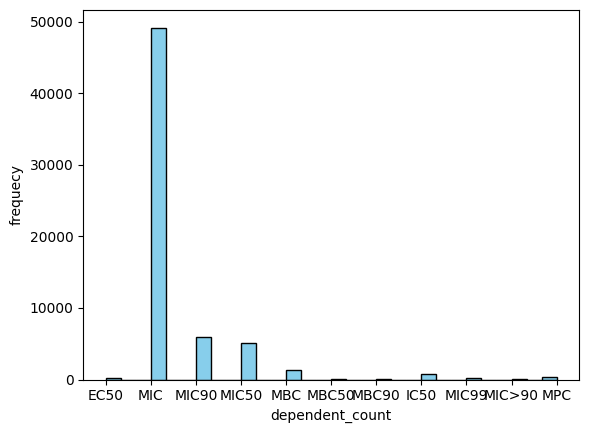

In [18]:
count_units = df_learn['standard_units'].value_counts()
# ax = category_counts.plot.hist(kde=True)
# Plotting a basic histogram
plt.hist(df_learn["standard_type"], bins=30, color='skyblue', edgecolor='black')
plt.ylabel("frequecy")
plt.xlabel("dependent_count")
print(count_units)

In [19]:
outliers_units = iqr_funct(count_units)

Upper outliers:
[0 1 2]
Lower outliers:
[]


In [20]:
# quart_units = quartile_funct(count_units,[0.2,0.9])
# quart_units

In [21]:
# Оставляем только те категории, у которых частота >= 3
filter_units = count_units[count_units > 2]

print(filter_units)

standard_units
ug.mL-1             57136
nM                   3835
ug ml-1              1741
10'-2 umol/ml         214
mg/L                  142
uM                    142
mg/ml                  40
10'-2micromol/ml       32
mM                     29
umol/ml                18
10'-2microM            16
10'-2umol              14
uL/ml                  13
mmol/ml                12
10'-2mmol/ml           12
10'-3micromol/ml       12
ppm                     8
umol/L                  5
Name: count, dtype: int64


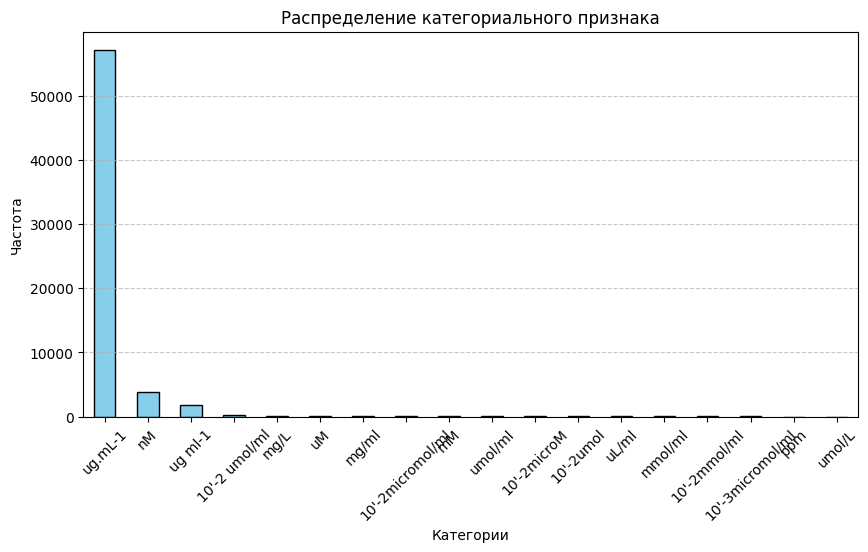

In [22]:
plot_type = histogram_plot(filter_units)

In [23]:
# Отфильтрованные значения, которые нам нужны
# Получаем список значений

# Фильтруем исходный датафрейм, оставляя только нужные строки
df_filtered = df_learn[df_learn['standard_units'].isin(filter_units.index)]

# Проверяем результат
print(df_filtered.shape)

(63421, 213)


###Target_organism

target_organism
Staphylococcus aureus                                     12351
Escherichia coli                                           7651
Pseudomonas aeruginosa                                     5384
Streptococcus pneumoniae                                   4214
Klebsiella pneumoniae                                      3060
                                                          ...  
Anaerostipes caccae                                           1
Aeromonas allosaccharophila                                   1
Mycolicibacterium novocastrense                               1
Staphylococcus epidermidis (strain ATCC 35984 / RP62A)        1
Mycolicibacter terrae                                         1
Name: count, Length: 406, dtype: int64


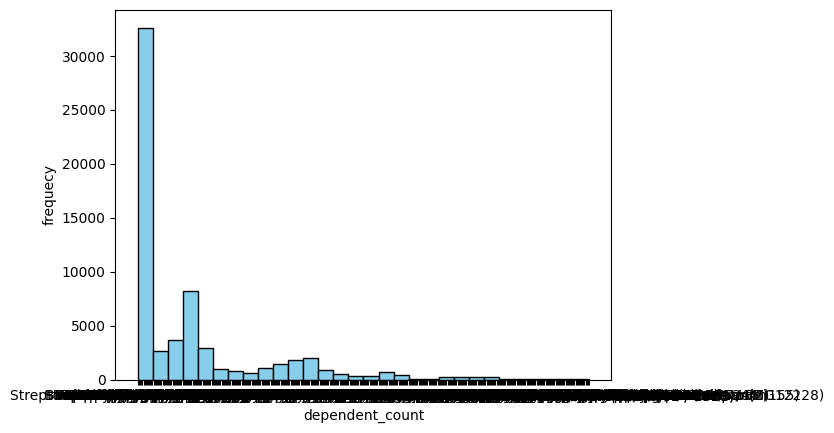

In [24]:
count_organism = df_filtered['target_organism'].value_counts()
# ax = category_counts.plot.hist(kde=True)
# Plotting a basic histogram
plt.hist(df_learn['target_organism'], bins=30, color='skyblue', edgecolor='black')
plt.ylabel("frequecy")
plt.xlabel("dependent_count")
print(count_organism)

In [25]:
outliers_units = iqr_funct(count_organism)

Upper outliers:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51]
Lower outliers:
[]


In [26]:
quart_organism = quartile_funct(count_organism,[0.25,0.75])
quart_organism

,count
0.25,4.00
0.75,60.75


In [27]:
# Оставляем только те категории, у которых частота >= 3
filter_organism = count_organism[count_organism > 51]

print(filter_organism)

target_organism
Staphylococcus aureus         12351
Escherichia coli               7651
Pseudomonas aeruginosa         5384
Streptococcus pneumoniae       4214
Klebsiella pneumoniae          3060
                              ...  
Streptococcus pasteurianus       56
Streptococcus sp.                55
Streptococcus mitis              55
Enterococcus sp.                 54
Streptococcus intermedius        52
Name: count, Length: 111, dtype: int64


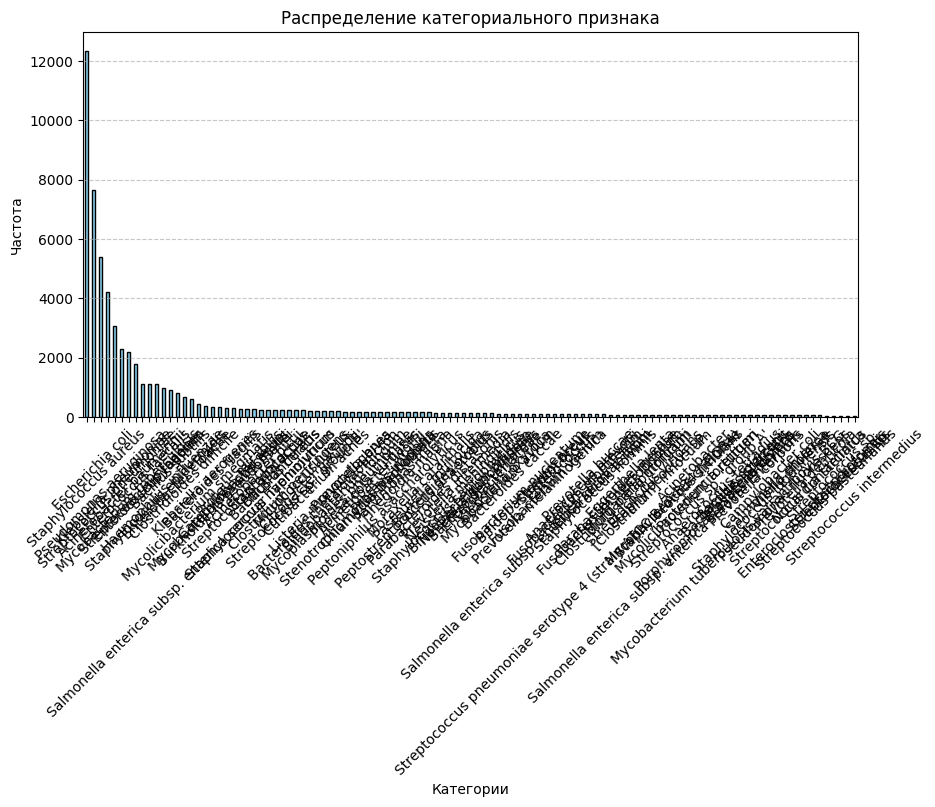

In [28]:
plot_type = histogram_plot(filter_organism)

In [29]:
# Фильтруем исходный датафрейм, оставляя только нужные строки
df_filtered = df_filtered[df_filtered['target_organism'].isin(filter_organism.index)]

# Проверяем результат
print(df_filtered.shape)

(59641, 213)


In [30]:
df_filtered

,standard_type,standard_units,target_organism,value,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,value_in_ug_ml
0,EC50,nM,Streptococcus,3.688,13.643057,-2.240737,13.643057,0.000000,0.227432,579.986,...,0,0,0,0,0,0,0,0,0,2.138988
1,EC50,nM,Streptococcus sp. 'group A',0.518,13.643057,-2.240737,13.643057,0.000000,0.227432,579.986,...,0,0,0,0,0,0,0,0,0,0.300433
3,MIC,nM,Escherichia coli,10.000,13.643057,-2.240737,13.643057,0.000000,0.227432,579.986,...,0,0,0,0,0,0,0,0,0,5.799860
4,MIC,nM,Klebsiella pneumoniae,10.000,13.643057,-2.240737,13.643057,0.000000,0.227432,579.986,...,0,0,0,0,0,0,0,0,0,5.799860
5,MIC,nM,Pseudomonas aeruginosa,10.000,13.643057,-2.240737,13.643057,0.000000,0.227432,579.986,...,0,0,0,0,0,0,0,0,0,5.799860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63418,MIC,ug.mL-1,Staphylococcus aureus,5.000,13.629793,-1.999418,13.629793,0.014743,0.305129,527.526,...,0,0,0,0,0,0,0,0,0,5.000000
63419,MIC,ug.mL-1,Staphylococcus epidermidis,5.000,13.629793,-1.999418,13.629793,0.014743,0.305129,527.526,...,0,0,0,0,0,0,0,0,0,5.000000
63420,MIC,ug.mL-1,Streptococcus pyogenes,5.000,13.629793,-1.999418,13.629793,0.014743,0.305129,527.526,...,0,0,0,0,0,0,0,0,0,5.000000
63421,MIC,ug.mL-1,Bacillus cereus,5.000,13.629793,-1.999418,13.629793,0.014743,0.305129,527.526,...,0,0,0,0,0,0,0,0,0,5.000000


In [31]:
# df_merged['target_organism'].dtype

In [32]:
# df_merged['target_organism'] = df_merged['target_organism'].astype('category')

In [33]:
# df_merged['target_organism'].apply(type).value_counts()

In [34]:
# df_merged['target_organism'].nunique()

In [35]:
# hist_result = histogram_plot(df_merged['standard_units'].value_counts())

In [36]:
# Подсчёт количества значений
# hist_result = histogram_plot(df_merged['target_organism'].value_counts())

##The detecting outliers in numeric data

In [37]:
# # Подсчет количества уникальных значений, встречающихся от 1 до 3 раз
# count_in_range = ((value_counts >= 1) & (value_counts <= 174)).sum()

# print(f"Количество значений с частотой от 1 до 3: {count_in_range}")

In [38]:
# # Фильтрация значений больше 500
# values_above_500 = df_merged[df_merged['value_in_ug_ml'] > 500]

# print(values_above_500)

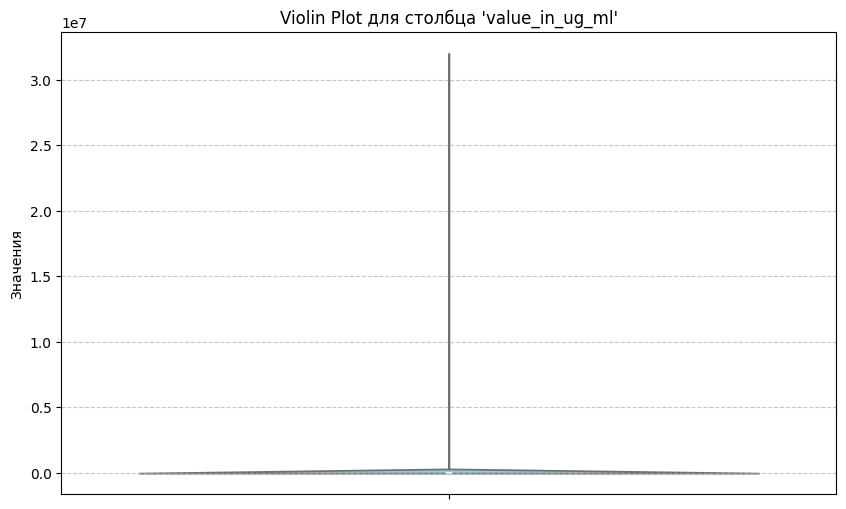

In [39]:


# Столбец для визуализации
column_to_plot = 'value_in_ug_ml'  # Замените на название вашего столбца

# Настройка размеров графика
plt.figure(figsize=(10, 6))

# Построение Violin Plot
sns.violinplot(
    data=df_filtered,
    y=column_to_plot,  # Указываем конкретный столбец
    inner="box",       # Включаем boxplot внутри
    color="skyblue"    # Цвет виолин-графика
)

# # Добавление точек данных (опционально)
# sns.swarmplot(
#     data=df_merged,
#     y=column_to_plot,
#     color="black",     # Цвет точек
#     size=3             # Размер точек
# )

# Настройка графика
plt.title(f"Violin Plot для столбца '{column_to_plot}'")
plt.ylabel("Значения")
plt.xlabel("")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Отображение графика
plt.show()


In [40]:
percentile25 = df_filtered['value_in_ug_ml'].quantile(0.25)
percentile75 = df_filtered['value_in_ug_ml'].quantile(0.75)

iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print("Upper limit", upper_limit)
print("Lower limit", lower_limit)

Upper limit 39.625
Lower limit -23.375


In [41]:
outliers_above = df_filtered[df_filtered['value_in_ug_ml'] > upper_limit]
outliers_below = df_filtered[df_filtered['value_in_ug_ml'] < lower_limit]
print("Outliers above lower limit:")
print(outliers_above)

print("Outliers below lower limit:")
print(outliers_below)

Outliers above lower limit:
      standard_type standard_units           target_organism  value  \
93              MIC        ug.mL-1  Clostridioides difficile  250.0   
95              MIC        ug.mL-1  Clostridioides difficile  500.0   
126             MIC        ug.mL-1  Streptococcus pneumoniae  256.0   
129             MIC        ug.mL-1  Streptococcus pneumoniae  256.0   
132             MIC        ug.mL-1  Streptococcus pneumoniae  256.0   
...             ...            ...                       ...    ...   
63383           MIC        ug.mL-1          Escherichia coli   64.0   
63385           MIC        ug.mL-1          Escherichia coli   64.0   
63386           MIC        ug.mL-1          Escherichia coli   64.0   
63387           MIC        ug.mL-1          Escherichia coli   64.0   
63414           MIC        ug.mL-1     Staphylococcus aureus  200.0   

       MaxEStateIndex  MinEStateIndex  MaxAbsEStateIndex  MinAbsEStateIndex  \
93          12.900963       -1.361938   

In [42]:
df_filtered = df_filtered[df_filtered['value_in_ug_ml'] < upper_limit]
df_filtered.shape

(49211, 213)

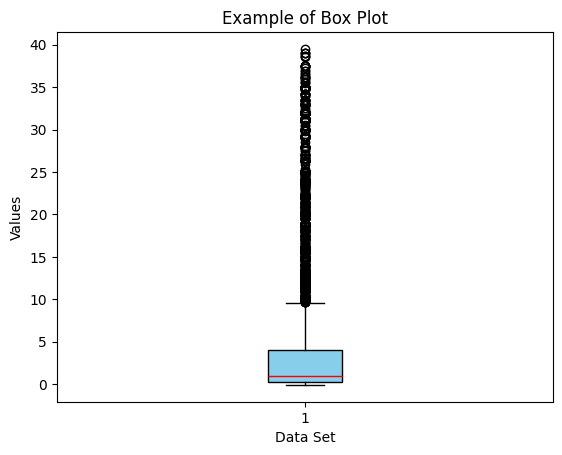

In [43]:
# Create a box plot
plt.boxplot(df_filtered['value_in_ug_ml'], vert=True, patch_artist=True,
            boxprops=dict(facecolor='skyblue'),
            medianprops=dict(color='red'))

plt.xlabel('Data Set')
plt.ylabel('Values')
plt.title('Example of Box Plot')
plt.show()

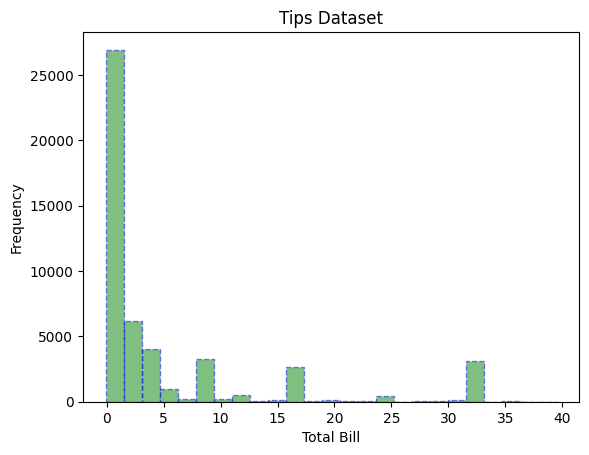

In [44]:
x = df_filtered['value_in_ug_ml']

plt.hist(x, bins=25, color='green', edgecolor='blue',
         linestyle='--', alpha=0.5)

plt.title("Tips Dataset")

plt.ylabel('Frequency')

plt.xlabel('Total Bill')

plt.show()

In [45]:


# # Цветовая палитра
# colors = ['#082040', '#175073', '#3285A6', '#B8D0D9', '#6CC5D9']

# # Создание subplot
# fig = make_subplots(
#     rows=1, cols=2,
#     subplot_titles=['Histogram for standard_value', 'Violin Plot for standard_value']
# )
# # Histogram
# hist_fig = px.histogram(
#     x=df_merged["standard_value"],
#     nbins=5,
#     color_discrete_sequence=colors,
#     opacity=0.7
# )

# # Добавление всех трасс из гистограммы
# # for trace in hist_fig['data']:
# #     fig.add_trace(trace, row=1, col=1)

# # # Violin plot
# # violin_fig = px.violin(
# #     df_merged,
# #     y="standard_value",
# #     color_discrete_sequence=colors,
# #     box=True,
# #     points="all"  # Показываем точки данных
# # )

# # # Добавление всех трасс из виолин-графика
# # for trace in violin_fig['data']:
# #     fig.add_trace(trace, row=1, col=2)



# # Отображение графика
# fig.show()


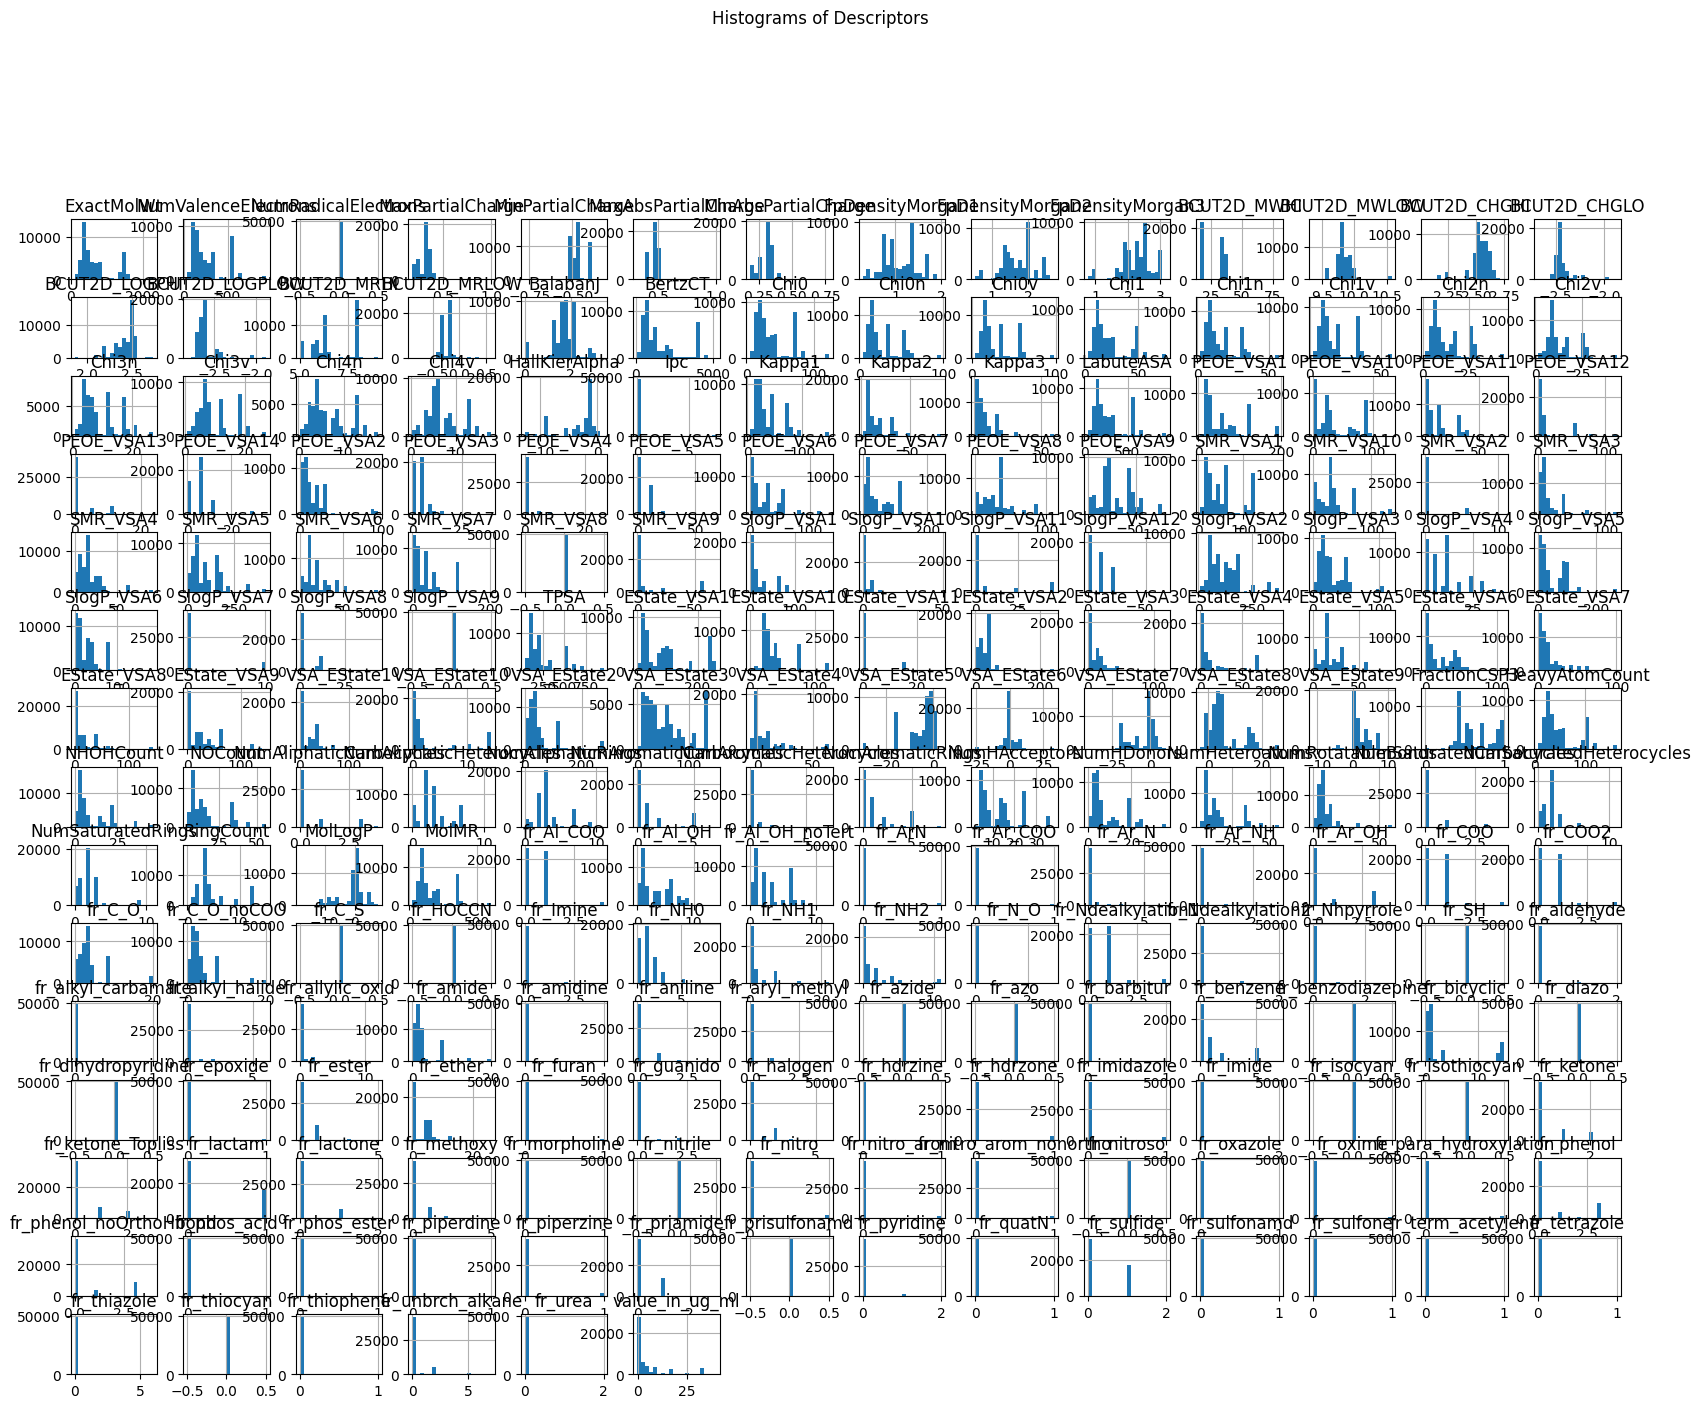

In [46]:
df_filtered.iloc[:,11:].hist(bins=20, figsize=(20, 15))
plt.suptitle('Histograms of Descriptors', x=0.5, y=1.02)
plt.show()


##Correlation matrix

In [47]:
nan_columns = df_filtered.columns[df_filtered.isna().any()]
print(nan_columns)


Index(['value', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO',
       'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BCUT2D_MRLOW'],
      dtype='object')


In [48]:
nan_counts = df_filtered[nan_columns].isna().sum()
print(nan_counts)

value             34
BCUT2D_MWHI       39
BCUT2D_MWLOW      39
BCUT2D_CHGHI      39
BCUT2D_CHGLO      39
BCUT2D_LOGPHI     39
BCUT2D_LOGPLOW    39
BCUT2D_MRHI       39
BCUT2D_MRLOW      39
dtype: int64


In [49]:
df_filtered[nan_columns] = df_filtered[nan_columns].apply(lambda x: x.fillna(x.median()))
df_filtered[nan_columns].isna().sum()

<ipython-input-49-d33a9734942f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[nan_columns] = df_filtered[nan_columns].apply(lambda x: x.fillna(x.median()))


,0
value,0
BCUT2D_MWHI,0
BCUT2D_MWLOW,0
BCUT2D_CHGHI,0
BCUT2D_CHGLO,0
BCUT2D_LOGPHI,0
BCUT2D_LOGPLOW,0
BCUT2D_MRHI,0
BCUT2D_MRLOW,0


In [50]:
df_filtered

,standard_type,standard_units,target_organism,value,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,value_in_ug_ml
0,EC50,nM,Streptococcus,3.688,13.643057,-2.240737,13.643057,0.000000,0.227432,579.986,...,0,0,0,0,0,0,0,0,0,2.138988
1,EC50,nM,Streptococcus sp. 'group A',0.518,13.643057,-2.240737,13.643057,0.000000,0.227432,579.986,...,0,0,0,0,0,0,0,0,0,0.300433
3,MIC,nM,Escherichia coli,10.000,13.643057,-2.240737,13.643057,0.000000,0.227432,579.986,...,0,0,0,0,0,0,0,0,0,5.799860
4,MIC,nM,Klebsiella pneumoniae,10.000,13.643057,-2.240737,13.643057,0.000000,0.227432,579.986,...,0,0,0,0,0,0,0,0,0,5.799860
5,MIC,nM,Pseudomonas aeruginosa,10.000,13.643057,-2.240737,13.643057,0.000000,0.227432,579.986,...,0,0,0,0,0,0,0,0,0,5.799860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63418,MIC,ug.mL-1,Staphylococcus aureus,5.000,13.629793,-1.999418,13.629793,0.014743,0.305129,527.526,...,0,0,0,0,0,0,0,0,0,5.000000
63419,MIC,ug.mL-1,Staphylococcus epidermidis,5.000,13.629793,-1.999418,13.629793,0.014743,0.305129,527.526,...,0,0,0,0,0,0,0,0,0,5.000000
63420,MIC,ug.mL-1,Streptococcus pyogenes,5.000,13.629793,-1.999418,13.629793,0.014743,0.305129,527.526,...,0,0,0,0,0,0,0,0,0,5.000000
63421,MIC,ug.mL-1,Bacillus cereus,5.000,13.629793,-1.999418,13.629793,0.014743,0.305129,527.526,...,0,0,0,0,0,0,0,0,0,5.000000


In [51]:
df_filtered['fr_thiocyan'].dropna()

,fr_thiocyan
0,0
1,0
3,0
4,0
5,0
...,...
63418,0
63419,0
63420,0
63421,0


In [52]:
df_corr_matrix = df_filtered.iloc[:, 3:-1]
df_corr_matrix

,value,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,3.688,13.643057,-2.240737,13.643057,0.000000,0.227432,579.986,549.746,579.150738,216,...,0,0,0,0,0,0,0,0,0,0
1,0.518,13.643057,-2.240737,13.643057,0.000000,0.227432,579.986,549.746,579.150738,216,...,0,0,0,0,0,0,0,0,0,0
3,10.000,13.643057,-2.240737,13.643057,0.000000,0.227432,579.986,549.746,579.150738,216,...,0,0,0,0,0,0,0,0,0,0
4,10.000,13.643057,-2.240737,13.643057,0.000000,0.227432,579.986,549.746,579.150738,216,...,0,0,0,0,0,0,0,0,0,0
5,10.000,13.643057,-2.240737,13.643057,0.000000,0.227432,579.986,549.746,579.150738,216,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63418,5.000,13.629793,-1.999418,13.629793,0.014743,0.305129,527.526,498.294,527.179146,202,...,0,0,0,0,0,0,0,0,0,0
63419,5.000,13.629793,-1.999418,13.629793,0.014743,0.305129,527.526,498.294,527.179146,202,...,0,0,0,0,0,0,0,0,0,0
63420,5.000,13.629793,-1.999418,13.629793,0.014743,0.305129,527.526,498.294,527.179146,202,...,0,0,0,0,0,0,0,0,0,0
63421,5.000,13.629793,-1.999418,13.629793,0.014743,0.305129,527.526,498.294,527.179146,202,...,0,0,0,0,0,0,0,0,0,0


In [53]:
# Получаем матрицу корреляций Спирмена
corr_matrix = df_corr_matrix.corr()

# Получаем индексы столбцов, которые имеют корреляцию больше 0.75
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Находим пары столбцов с корреляцией больше 0.75
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]

# Удаляем эти столбцы
df_corr_matrix = df_corr_matrix.drop(columns=to_drop)

# Выводим, какие столбцы были удалены
print(f"Удаленные столбцы: {to_drop}")

Удаленные столбцы: ['MaxAbsEStateIndex', 'HeavyAtomMolWt', 'ExactMolWt', 'NumValenceElectrons', 'MinAbsPartialCharge', 'FpDensityMorgan2', 'FpDensityMorgan3', 'BCUT2D_CHGLO', 'BCUT2D_LOGPLOW', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA12', 'PEOE_VSA2', 'PEOE_VSA7', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA3', 'SMR_VSA5', 'SMR_VSA9', 'SlogP_VSA1', 'SlogP_VSA11', 'SlogP_VSA12', 'SlogP_VSA2', 'SlogP_VSA3', 'SlogP_VSA5', 'SlogP_VSA6', 'SlogP_VSA7', 'TPSA', 'EState_VSA1', 'EState_VSA10', 'EState_VSA11', 'EState_VSA2', 'EState_VSA4', 'EState_VSA8', 'EState_VSA9', 'VSA_EState1', 'VSA_EState10', 'VSA_EState2', 'VSA_EState3', 'VSA_EState5', 'HeavyAtomCount', 'NHOHCount', 'NOCount', 'NumAliphaticRings', 'NumAromaticCarbocycles', 'NumAromaticRings', 'NumHAcceptors', 'NumHDonors', 'NumHeteroatoms', 'NumRotatableBonds', 'NumSaturatedRings', 'RingCount', '

In [54]:
# # Получаем матрицу корреляций Спирмена
# corr_matrix = df_corr_matrix.corr()

# # Создаем маску для корреляции больше 0.75 (верхняя треугольная часть)
# to_drop = [column for column in corr_matrix.columns if any(corr_matrix[column] > 0.80)]

# # Удаляем коррелирующие столбцы, оставляем только первый столбец из каждой пары
# df_corr_matrix = df_corr_matrix.drop(columns=to_drop)

# print(f"Удаленные столбцы: {to_drop}")
# display(corr_matrix)

In [55]:
df_corr_matrix

,value,MaxEStateIndex,MinEStateIndex,MinAbsEStateIndex,qed,MolWt,NumRadicalElectrons,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,...,fr_quatN,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,3.688,13.643057,-2.240737,0.000000,0.227432,579.986,0,0.201631,-0.506848,0.506848,...,0,0,0,0,0,0,0,0,0,0
1,0.518,13.643057,-2.240737,0.000000,0.227432,579.986,0,0.201631,-0.506848,0.506848,...,0,0,0,0,0,0,0,0,0,0
3,10.000,13.643057,-2.240737,0.000000,0.227432,579.986,0,0.201631,-0.506848,0.506848,...,0,0,0,0,0,0,0,0,0,0
4,10.000,13.643057,-2.240737,0.000000,0.227432,579.986,0,0.201631,-0.506848,0.506848,...,0,0,0,0,0,0,0,0,0,0
5,10.000,13.643057,-2.240737,0.000000,0.227432,579.986,0,0.201631,-0.506848,0.506848,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63418,5.000,13.629793,-1.999418,0.014743,0.305129,527.526,0,0.201631,-0.506848,0.506848,...,0,0,0,0,0,0,0,0,0,0
63419,5.000,13.629793,-1.999418,0.014743,0.305129,527.526,0,0.201631,-0.506848,0.506848,...,0,0,0,0,0,0,0,0,0,0
63420,5.000,13.629793,-1.999418,0.014743,0.305129,527.526,0,0.201631,-0.506848,0.506848,...,0,0,0,0,0,0,0,0,0,0
63421,5.000,13.629793,-1.999418,0.014743,0.305129,527.526,0,0.201631,-0.506848,0.506848,...,0,0,0,0,0,0,0,0,0,0


In [56]:
df_filtered['NumRadicalElectrons']

,NumRadicalElectrons
0,0
1,0
3,0
4,0
5,0
...,...
63418,0
63419,0
63420,0
63421,0


Remove the columns with deviation close to zero

In [57]:
# Инициализируем VarianceThreshold (удаляем столбцы с дисперсией 0)
selector = VarianceThreshold(threshold=0)

# Применяем его к данным, получаем булевый массив, где True означает, что дисперсия больше 0
selector.fit(df_corr_matrix)

# Оставляем только те столбцы, у которых дисперсия больше 0
df_corr_matrix = df_corr_matrix.loc[:, selector.get_support()]

# Выводим оставшиеся столбцы
print("Оставшиеся столбцы после удаления с нулевой дисперсией:", df_corr_matrix.shape)

Оставшиеся столбцы после удаления с нулевой дисперсией: (49211, 88)


In [58]:
df_filtered2 = pd.concat([df_filtered.iloc[:, :3],  df_corr_matrix, df_filtered.iloc[:, -1:]], axis=1)
df_filtered2

,standard_type,standard_units,target_organism,value,MaxEStateIndex,MinEStateIndex,MinAbsEStateIndex,qed,MolWt,MaxPartialCharge,...,fr_quatN,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea,value_in_ug_ml
0,EC50,nM,Streptococcus,3.688,13.643057,-2.240737,0.000000,0.227432,579.986,0.201631,...,0,0,0,0,0,0,0,0,0,2.138988
1,EC50,nM,Streptococcus sp. 'group A',0.518,13.643057,-2.240737,0.000000,0.227432,579.986,0.201631,...,0,0,0,0,0,0,0,0,0,0.300433
3,MIC,nM,Escherichia coli,10.000,13.643057,-2.240737,0.000000,0.227432,579.986,0.201631,...,0,0,0,0,0,0,0,0,0,5.799860
4,MIC,nM,Klebsiella pneumoniae,10.000,13.643057,-2.240737,0.000000,0.227432,579.986,0.201631,...,0,0,0,0,0,0,0,0,0,5.799860
5,MIC,nM,Pseudomonas aeruginosa,10.000,13.643057,-2.240737,0.000000,0.227432,579.986,0.201631,...,0,0,0,0,0,0,0,0,0,5.799860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63418,MIC,ug.mL-1,Staphylococcus aureus,5.000,13.629793,-1.999418,0.014743,0.305129,527.526,0.201631,...,0,0,0,0,0,0,0,0,0,5.000000
63419,MIC,ug.mL-1,Staphylococcus epidermidis,5.000,13.629793,-1.999418,0.014743,0.305129,527.526,0.201631,...,0,0,0,0,0,0,0,0,0,5.000000
63420,MIC,ug.mL-1,Streptococcus pyogenes,5.000,13.629793,-1.999418,0.014743,0.305129,527.526,0.201631,...,0,0,0,0,0,0,0,0,0,5.000000
63421,MIC,ug.mL-1,Bacillus cereus,5.000,13.629793,-1.999418,0.014743,0.305129,527.526,0.201631,...,0,0,0,0,0,0,0,0,0,5.000000


In [59]:
# sns.heatmap(df_corr_matrix.corr(),vmin=-1, vmax=1, annot=True, cmap='coolwarm')
# plt.show()
# df_corr_matrix.corr()
# df_corr_matrix.corr(method='kendall')


##Usefull functions

In [60]:
# count_type = (df_learn['standard_type'] == 'MIC>90').sum()
# print(count_type)

In [61]:
# # Шаг 2: Создание DataFrame с PCA компонентами
# df_pc = pd.DataFrame(data=transformed_data, columns=[f'PC{i}' for i in range(1, 14)])  # Имена компонент: PC1, PC2 и т.д.

# # Шаг 3: Объединение PCA компонент с исходными дескрипторами
# # df - это оригинальный DataFrame, содержащий исходные дескрипторы, кроме 'smiles' и 'gap'
# df_col = pd.concat(
#     [
#         df_pc[['PC1', 'PC2', 'PC3','PC4']],  # Берем первые три компоненты PCA
#         df_smlcode2
#     ],
#     axis=1
# )
# # df_col.iloc[:14,:10]
# # Шаг 4: Вычисление корреляционной матрицы
# corMatrix = df_col.corr()


In [62]:
# # Шаг 5: Выбор подмножества данных (первые 10 компонент PCA и первые 14 исходных дескрипторов)
# corMatrix_subset = corMatrix.iloc[:14, :10]

# # Шаг 6: Визуализация корреляционной матрицы
# sns.set(rc={'figure.figsize': (30, 22)})
# sns.heatmap(corMatrix_subset, annot=True, fmt='.3f', cmap='coolwarm')
# plt.title('Correlation Matrix: First 10 PCs and Original Descriptors')
# plt.show()

In [63]:
# df_pca = pd.concat([df_x, transformed_df], axis=1)
# df_pca

In [64]:
# from sklearn.cluster import KMeans

# # Кластеризация (определим 3 группы)
# kmeans = KMeans(n_clusters=3, random_state=42)
# labels = kmeans.fit_predict(transformed_data)

In [65]:
# sns.scatterplot(
#     x=transformed_data[:, 0], #Учитываем толькопервые две кмпоненты потому что они самые информативные
#     y=transformed_data[:, 1],
#     hue=labels,  # Указываем группы для цвета
#     palette='viridis'  # Устанавливаем цветовую палитру (можно выбрать другую)
# )
# plt.title('PCA')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.show()

##Normalized

In [66]:
df_nosmilesandvalue = df_filtered2.copy()
# target_column = df_nosmilesandvalue.pop('standard_value')

In [67]:
df_nosmilesandvalue.reset_index(drop=True, inplace=True)
df_nosmilesandvalue

,standard_type,standard_units,target_organism,value,MaxEStateIndex,MinEStateIndex,MinAbsEStateIndex,qed,MolWt,MaxPartialCharge,...,fr_quatN,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea,value_in_ug_ml
0,EC50,nM,Streptococcus,3.688,13.643057,-2.240737,0.000000,0.227432,579.986,0.201631,...,0,0,0,0,0,0,0,0,0,2.138988
1,EC50,nM,Streptococcus sp. 'group A',0.518,13.643057,-2.240737,0.000000,0.227432,579.986,0.201631,...,0,0,0,0,0,0,0,0,0,0.300433
2,MIC,nM,Escherichia coli,10.000,13.643057,-2.240737,0.000000,0.227432,579.986,0.201631,...,0,0,0,0,0,0,0,0,0,5.799860
3,MIC,nM,Klebsiella pneumoniae,10.000,13.643057,-2.240737,0.000000,0.227432,579.986,0.201631,...,0,0,0,0,0,0,0,0,0,5.799860
4,MIC,nM,Pseudomonas aeruginosa,10.000,13.643057,-2.240737,0.000000,0.227432,579.986,0.201631,...,0,0,0,0,0,0,0,0,0,5.799860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49206,MIC,ug.mL-1,Staphylococcus aureus,5.000,13.629793,-1.999418,0.014743,0.305129,527.526,0.201631,...,0,0,0,0,0,0,0,0,0,5.000000
49207,MIC,ug.mL-1,Staphylococcus epidermidis,5.000,13.629793,-1.999418,0.014743,0.305129,527.526,0.201631,...,0,0,0,0,0,0,0,0,0,5.000000
49208,MIC,ug.mL-1,Streptococcus pyogenes,5.000,13.629793,-1.999418,0.014743,0.305129,527.526,0.201631,...,0,0,0,0,0,0,0,0,0,5.000000
49209,MIC,ug.mL-1,Bacillus cereus,5.000,13.629793,-1.999418,0.014743,0.305129,527.526,0.201631,...,0,0,0,0,0,0,0,0,0,5.000000


I need check, how many unique organisms are in

In [105]:
df_nosmilesandvalue['target_organism'].nunique()

111

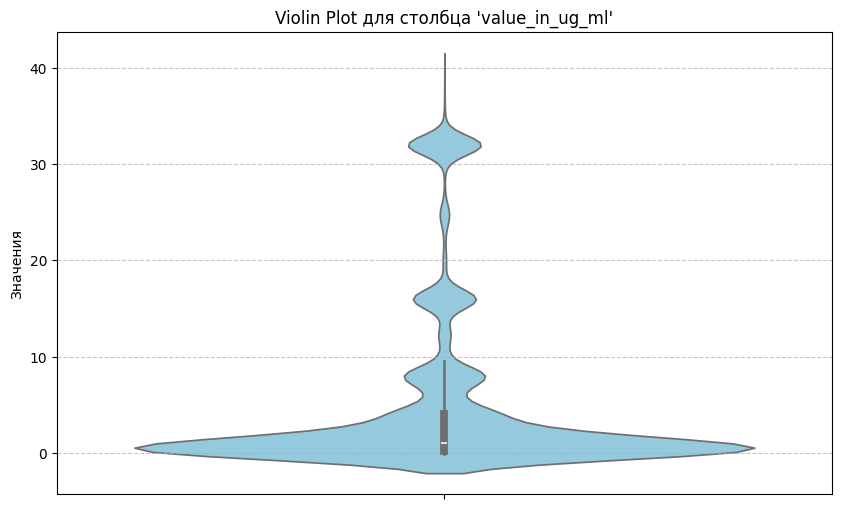

In [68]:
# Столбец для визуализации
column_to_plot = 'value_in_ug_ml'  # Замените на название вашего столбца

# Настройка размеров графика
plt.figure(figsize=(10, 6))

# Построение Violin Plot
sns.violinplot(
    data=df_nosmilesandvalue,
    y=column_to_plot,  # Указываем конкретный столбец
    inner="box",       # Включаем boxplot внутри
    color="skyblue"    # Цвет виолин-графика
)

# # Добавление точек данных (опционально)
# sns.swarmplot(
#     data=df_merged,
#     y=column_to_plot,
#     color="black",     # Цвет точек
#     size=3             # Размер точек
# )

# Настройка графика
plt.title(f"Violin Plot для столбца '{column_to_plot}'")
plt.ylabel("Значения")
plt.xlabel("")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Отображение графика
plt.show()

In [69]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Инициализация LabelEncoder
label_encoder = LabelEncoder()

# Указываем столбцы, которые нужно кодировать
columns_to_encode = ["standard_type", "standard_units",'target_organism']

# Создаём новый DataFrame для кодированных столбцов
df_smlcode = pd.DataFrame()

# Кодируем каждый из указанных столбцов
for column in columns_to_encode:
    if column in df_nosmilesandvalue.columns:  # Проверяем, существует ли столбец в DataFrame
        df_smlcode[column] = label_encoder.fit_transform(df_nosmilesandvalue[column])
    else:
        print(f"Столбец '{column}' отсутствует в DataFrame и будет пропущен.")
print(df_smlcode)


       standard_type  standard_units  target_organism
0                  0               6               96
1                  0               6              106
2                  5               6               37
3                  5               6               46
4                  5               6               80
...              ...             ...              ...
49206              5              10               87
49207              5              10               88
49208              5              10              104
49209              5              10                7
49210              5              10                9

[49211 rows x 3 columns]


In [70]:
# Добавляем остальные столбцы (не входящие в columns_to_encode) в DataFrame
remaining_columns = df_nosmilesandvalue.loc[:, ~df_nosmilesandvalue.columns.isin(columns_to_encode)]
df_smlcode = pd.concat([df_smlcode, remaining_columns], axis=1)

In [71]:
df_smlcode2 = df_smlcode.copy()

In [72]:
# df_smlcode2.drop(columns=['parent_molecule_chembl_id', 'uo_units'], inplace=True)
df_smlcode2

,standard_type,standard_units,target_organism,value,MaxEStateIndex,MinEStateIndex,MinAbsEStateIndex,qed,MolWt,MaxPartialCharge,...,fr_quatN,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea,value_in_ug_ml
0,0,6,96,3.688,13.643057,-2.240737,0.000000,0.227432,579.986,0.201631,...,0,0,0,0,0,0,0,0,0,2.138988
1,0,6,106,0.518,13.643057,-2.240737,0.000000,0.227432,579.986,0.201631,...,0,0,0,0,0,0,0,0,0,0.300433
2,5,6,37,10.000,13.643057,-2.240737,0.000000,0.227432,579.986,0.201631,...,0,0,0,0,0,0,0,0,0,5.799860
3,5,6,46,10.000,13.643057,-2.240737,0.000000,0.227432,579.986,0.201631,...,0,0,0,0,0,0,0,0,0,5.799860
4,5,6,80,10.000,13.643057,-2.240737,0.000000,0.227432,579.986,0.201631,...,0,0,0,0,0,0,0,0,0,5.799860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49206,5,10,87,5.000,13.629793,-1.999418,0.014743,0.305129,527.526,0.201631,...,0,0,0,0,0,0,0,0,0,5.000000
49207,5,10,88,5.000,13.629793,-1.999418,0.014743,0.305129,527.526,0.201631,...,0,0,0,0,0,0,0,0,0,5.000000
49208,5,10,104,5.000,13.629793,-1.999418,0.014743,0.305129,527.526,0.201631,...,0,0,0,0,0,0,0,0,0,5.000000
49209,5,10,7,5.000,13.629793,-1.999418,0.014743,0.305129,527.526,0.201631,...,0,0,0,0,0,0,0,0,0,5.000000


In [73]:
# Перемещаем столбец "target" в начало
column_to_move = "value_in_ug_ml"
df = df_smlcode2[[column_to_move] + [col for col in df_smlcode2.columns if col != column_to_move]]

In [74]:
df.drop(columns=['value'], inplace=True)

<ipython-input-74-30d8502a8039>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['value'], inplace=True)


In [75]:
df

,value_in_ug_ml,standard_type,standard_units,target_organism,MaxEStateIndex,MinEStateIndex,MinAbsEStateIndex,qed,MolWt,MaxPartialCharge,...,fr_pyridine,fr_quatN,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea
0,2.138988,0,6,96,13.643057,-2.240737,0.000000,0.227432,579.986,0.201631,...,0,0,0,0,0,0,0,0,0,0
1,0.300433,0,6,106,13.643057,-2.240737,0.000000,0.227432,579.986,0.201631,...,0,0,0,0,0,0,0,0,0,0
2,5.799860,5,6,37,13.643057,-2.240737,0.000000,0.227432,579.986,0.201631,...,0,0,0,0,0,0,0,0,0,0
3,5.799860,5,6,46,13.643057,-2.240737,0.000000,0.227432,579.986,0.201631,...,0,0,0,0,0,0,0,0,0,0
4,5.799860,5,6,80,13.643057,-2.240737,0.000000,0.227432,579.986,0.201631,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49206,5.000000,5,10,87,13.629793,-1.999418,0.014743,0.305129,527.526,0.201631,...,0,0,0,0,0,0,0,0,0,0
49207,5.000000,5,10,88,13.629793,-1.999418,0.014743,0.305129,527.526,0.201631,...,0,0,0,0,0,0,0,0,0,0
49208,5.000000,5,10,104,13.629793,-1.999418,0.014743,0.305129,527.526,0.201631,...,0,0,0,0,0,0,0,0,0,0
49209,5.000000,5,10,7,13.629793,-1.999418,0.014743,0.305129,527.526,0.201631,...,0,0,0,0,0,0,0,0,0,0


In [76]:
# Находим количество пропусков в каждом столбце
missing_values = df.isnull().sum()

# Оставляем только те столбцы, где есть пропуски
missing_values = missing_values[missing_values > 0]

# Выводим результат
print(missing_values)

Series([], dtype: int64)


In [77]:
# # Находим столбцы с пропусками
# missing_columns = df.columns[df.isnull().any()]

# # Заполняем пропуски медианным значением каждого столбца
# for col in missing_columns:
#     median_value = df[col].median()  # Вычисляем медиану
#     df[col].fillna(median_value, inplace=True)  # Заполняем пропуски

# # Выводим обновленный датафрейм
# display(df)

In [78]:
df.to_csv('df_normalized.csv', index=False)

In [79]:
from sklearn.preprocessing import StandardScaler
df_no_y = df.iloc[:,1:]
x = StandardScaler().fit_transform(df_no_y) # normalizing the features

df_scaled = pd.DataFrame(x, columns=df_no_y.columns)

# Проверяем результат
display(df_scaled)

,standard_type,standard_units,target_organism,MaxEStateIndex,MinEStateIndex,MinAbsEStateIndex,qed,MolWt,MaxPartialCharge,MinPartialCharge,...,fr_pyridine,fr_quatN,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea
0,-5.013479,-3.209955,1.151782,0.296427,-0.714175,-1.050724,-0.246337,-0.271683,-1.720265,-0.981312,...,-0.186361,-0.012751,-0.031891,-0.060759,-0.009016,-0.022992,-0.077159,-0.01008,-0.366231,-0.021752
1,-5.013479,-3.209955,1.481298,0.296427,-0.714175,-1.050724,-0.246337,-0.271683,-1.720265,-0.981312,...,-0.186361,-0.012751,-0.031891,-0.060759,-0.009016,-0.022992,-0.077159,-0.01008,-0.366231,-0.021752
2,-0.177325,-3.209955,-0.792362,0.296427,-0.714175,-1.050724,-0.246337,-0.271683,-1.720265,-0.981312,...,-0.186361,-0.012751,-0.031891,-0.060759,-0.009016,-0.022992,-0.077159,-0.01008,-0.366231,-0.021752
3,-0.177325,-3.209955,-0.495797,0.296427,-0.714175,-1.050724,-0.246337,-0.271683,-1.720265,-0.981312,...,-0.186361,-0.012751,-0.031891,-0.060759,-0.009016,-0.022992,-0.077159,-0.01008,-0.366231,-0.021752
4,-0.177325,-3.209955,0.624557,0.296427,-0.714175,-1.050724,-0.246337,-0.271683,-1.720265,-0.981312,...,-0.186361,-0.012751,-0.031891,-0.060759,-0.009016,-0.022992,-0.077159,-0.01008,-0.366231,-0.021752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49206,-0.177325,0.269012,0.855218,0.288094,-0.377075,-0.885993,0.122450,-0.385962,-1.720265,-0.981312,...,-0.186361,-0.012751,-0.031891,-0.060759,-0.009016,-0.022992,-0.077159,-0.01008,-0.366231,-0.021752
49207,-0.177325,0.269012,0.888170,0.288094,-0.377075,-0.885993,0.122450,-0.385962,-1.720265,-0.981312,...,-0.186361,-0.012751,-0.031891,-0.060759,-0.009016,-0.022992,-0.077159,-0.01008,-0.366231,-0.021752
49208,-0.177325,0.269012,1.415395,0.288094,-0.377075,-0.885993,0.122450,-0.385962,-1.720265,-0.981312,...,-0.186361,-0.012751,-0.031891,-0.060759,-0.009016,-0.022992,-0.077159,-0.01008,-0.366231,-0.021752
49209,-0.177325,0.269012,-1.780909,0.288094,-0.377075,-0.885993,0.122450,-0.385962,-1.720265,-0.981312,...,-0.186361,-0.012751,-0.031891,-0.060759,-0.009016,-0.022992,-0.077159,-0.01008,-0.366231,-0.021752


Выше находится датасет с нормализованными значениями но с названиями колонок - это нужно для определения того какой дескриптор больше всего влияет на таргетную величину  

In [80]:
df_x = pd.DataFrame(x)
# target_column = df_x.pop(0)
columns_with_nan = df_x.columns[df_x.isnull().any()]
display(df_x.head(10))
print(columns_with_nan)
# target_column


,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,-5.013479,-3.209955,1.151782,0.296427,-0.714175,-1.050724,-0.246337,-0.271683,-1.720265,-0.981312,...,-0.186361,-0.012751,-0.031891,-0.060759,-0.009016,-0.022992,-0.077159,-0.01008,-0.366231,-0.021752
1,-5.013479,-3.209955,1.481298,0.296427,-0.714175,-1.050724,-0.246337,-0.271683,-1.720265,-0.981312,...,-0.186361,-0.012751,-0.031891,-0.060759,-0.009016,-0.022992,-0.077159,-0.01008,-0.366231,-0.021752
2,-0.177325,-3.209955,-0.792362,0.296427,-0.714175,-1.050724,-0.246337,-0.271683,-1.720265,-0.981312,...,-0.186361,-0.012751,-0.031891,-0.060759,-0.009016,-0.022992,-0.077159,-0.01008,-0.366231,-0.021752
3,-0.177325,-3.209955,-0.495797,0.296427,-0.714175,-1.050724,-0.246337,-0.271683,-1.720265,-0.981312,...,-0.186361,-0.012751,-0.031891,-0.060759,-0.009016,-0.022992,-0.077159,-0.01008,-0.366231,-0.021752
4,-0.177325,-3.209955,0.624557,0.296427,-0.714175,-1.050724,-0.246337,-0.271683,-1.720265,-0.981312,...,-0.186361,-0.012751,-0.031891,-0.060759,-0.009016,-0.022992,-0.077159,-0.01008,-0.366231,-0.021752
5,-0.177325,-3.209955,-1.978619,0.296427,-0.714175,-1.050724,-0.246337,-0.271683,-1.720265,-0.981312,...,-0.186361,-0.012751,-0.031891,-0.060759,-0.009016,-0.022992,-0.077159,-0.01008,-0.366231,-0.021752
6,-0.177325,-3.209955,0.855218,0.296427,-0.714175,-1.050724,-0.246337,-0.271683,-1.720265,-0.981312,...,-0.186361,-0.012751,-0.031891,-0.060759,-0.009016,-0.022992,-0.077159,-0.01008,-0.366231,-0.021752
7,-0.177325,0.269012,-1.649103,-0.169756,0.513423,0.597202,0.754408,-0.609325,-1.132687,1.695767,...,-0.186361,-0.012751,-0.031891,-0.060759,-0.009016,-0.022992,-0.077159,-0.01008,-0.366231,-0.021752
8,-0.177325,0.269012,-1.550248,-0.169756,0.513423,0.597202,0.754408,-0.609325,-1.132687,1.695767,...,-0.186361,-0.012751,-0.031891,-0.060759,-0.009016,-0.022992,-0.077159,-0.01008,-0.366231,-0.021752
9,-0.177325,0.269012,-1.154829,-0.169756,0.513423,0.597202,0.754408,-0.609325,-1.132687,1.695767,...,-0.186361,-0.012751,-0.031891,-0.060759,-0.009016,-0.022992,-0.077159,-0.01008,-0.366231,-0.021752


Index([], dtype='int64')


In [81]:
df_normal = pd.concat([df.iloc[:,0], df_scaled], axis=1)
df_normal

,value_in_ug_ml,standard_type,standard_units,target_organism,MaxEStateIndex,MinEStateIndex,MinAbsEStateIndex,qed,MolWt,MaxPartialCharge,...,fr_pyridine,fr_quatN,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea
0,2.138988,-5.013479,-3.209955,1.151782,0.296427,-0.714175,-1.050724,-0.246337,-0.271683,-1.720265,...,-0.186361,-0.012751,-0.031891,-0.060759,-0.009016,-0.022992,-0.077159,-0.01008,-0.366231,-0.021752
1,0.300433,-5.013479,-3.209955,1.481298,0.296427,-0.714175,-1.050724,-0.246337,-0.271683,-1.720265,...,-0.186361,-0.012751,-0.031891,-0.060759,-0.009016,-0.022992,-0.077159,-0.01008,-0.366231,-0.021752
2,5.799860,-0.177325,-3.209955,-0.792362,0.296427,-0.714175,-1.050724,-0.246337,-0.271683,-1.720265,...,-0.186361,-0.012751,-0.031891,-0.060759,-0.009016,-0.022992,-0.077159,-0.01008,-0.366231,-0.021752
3,5.799860,-0.177325,-3.209955,-0.495797,0.296427,-0.714175,-1.050724,-0.246337,-0.271683,-1.720265,...,-0.186361,-0.012751,-0.031891,-0.060759,-0.009016,-0.022992,-0.077159,-0.01008,-0.366231,-0.021752
4,5.799860,-0.177325,-3.209955,0.624557,0.296427,-0.714175,-1.050724,-0.246337,-0.271683,-1.720265,...,-0.186361,-0.012751,-0.031891,-0.060759,-0.009016,-0.022992,-0.077159,-0.01008,-0.366231,-0.021752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49206,5.000000,-0.177325,0.269012,0.855218,0.288094,-0.377075,-0.885993,0.122450,-0.385962,-1.720265,...,-0.186361,-0.012751,-0.031891,-0.060759,-0.009016,-0.022992,-0.077159,-0.01008,-0.366231,-0.021752
49207,5.000000,-0.177325,0.269012,0.888170,0.288094,-0.377075,-0.885993,0.122450,-0.385962,-1.720265,...,-0.186361,-0.012751,-0.031891,-0.060759,-0.009016,-0.022992,-0.077159,-0.01008,-0.366231,-0.021752
49208,5.000000,-0.177325,0.269012,1.415395,0.288094,-0.377075,-0.885993,0.122450,-0.385962,-1.720265,...,-0.186361,-0.012751,-0.031891,-0.060759,-0.009016,-0.022992,-0.077159,-0.01008,-0.366231,-0.021752
49209,5.000000,-0.177325,0.269012,-1.780909,0.288094,-0.377075,-0.885993,0.122450,-0.385962,-1.720265,...,-0.186361,-0.012751,-0.031891,-0.060759,-0.009016,-0.022992,-0.077159,-0.01008,-0.366231,-0.021752


In [103]:
len(df_normal['target_organism'].unique())

111

In [82]:
df_normal.to_csv('/content/drive/MyDrive/Susan_project/CSV_for_diploma/df_normal.csv', index=False)

In [83]:
# index_list = [8, 26, 27, 28, 29, 30, 31, 32, 33, 217]
# # df_x['8']=df_x[8].fillna(df_x[8].mean())
# for i in index_list:
#   df_x[i]=df_x[i].fillna(df_x[i].median())
# df_x[8].info()
# df_x = df_x.values

In [84]:
# np.mean(x), np.std(x)
print(np.isnan(df_x).any())  # True, если есть хотя бы одно значение NaN


0     False
1     False
2     False
3     False
4     False
      ...  
85    False
86    False
87    False
88    False
89    False
Length: 90, dtype: bool


In [85]:
# # Функция для визуализации пропусков
# # Просто показывает что нет никаких пропусков данных в df_x
# def plot_missing_data_matrix(df):
#     plt.figure(figsize=(10, 6))
#     sns.heatmap(
#         df.isnull(),
#         cmap="viridis",
#         cbar_kws={'label': 'Missing Data'},
#         yticklabels=False
#     )
#     plt.title("Missing Data Matrix")
#     plt.xlabel("Columns")
#     plt.ylabel("Rows")
#     plt.show()

В df_x нет пропущенных данных - об этом говорит plot_missing_data_matrix(df_x)

In [86]:
# plot_missing_data_matrix(df_x)
# missingno.matrix(df_x,figsize=(10,5), fontsize=12)

In [87]:
np.mean(df_x),np.std(df_x)

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


(7.601492869883442e-17,
 0     1.0
 1     1.0
 2     1.0
 3     1.0
 4     1.0
      ... 
 85    1.0
 86    1.0
 87    1.0
 88    1.0
 89    1.0
 Length: 90, dtype: float64)

## PCA

In [88]:
def PCA_method(Data_normalized):
    # Применение метода главных компонент (PCA) для снижения размерности
    # Создадим объект PCA
    pca = PCA()

    # Обучим PCA на данных
    pca.fit(Data_normalized)

    # Получим explained variance ratio для каждой компоненты
    explained_variance_ratio = pca.explained_variance_ratio_

    # Вычислим кумулятивную explained variance ratio
    cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

    # Найдем количество компонент, которые объясняют, например, 95% дисперсии
    n_components = np.argmax(cumulative_explained_variance_ratio >= 0.80) + 1

    return n_components



In [89]:
PCA_value = PCA_method(df_x)
print(PCA_value)
#  print(f"Оптимальное количество компонент для объяснения 95% дисперсии: {n_components}")

22


In [90]:
pca = PCA(n_components=22)

transformed_data = pca.fit_transform(df_x)

print(transformed_data)

[[ 0.37019217  0.11234443  0.80364275 ...  0.70102886 -3.30627862
   1.31286141]
 [ 0.3860884   0.12089374  0.82146768 ...  0.7523285  -3.31852091
   1.310748  ]
 [ 0.17069489  0.11801364  0.61866923 ... -0.08901223 -0.84791198
   0.38155223]
 ...
 [ 0.15922503  0.28789554  0.02531184 ... -0.04099018  0.4498996
  -0.08061776]
 [ 0.00503162  0.2049673  -0.14758996 ... -0.53859674  0.56864977
  -0.06011767]
 [ 0.00821086  0.20667716 -0.14402497 ... -0.52833681  0.56620132
  -0.06054035]]


<Axes: title={'center': 'Component Variance'}, xlabel='PCs', ylabel='Eigenvalues'>

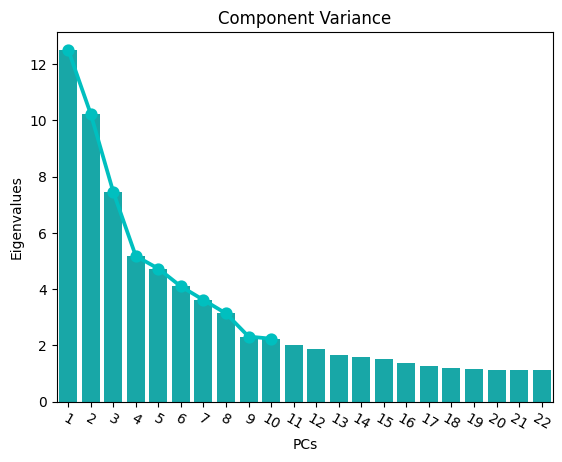

In [91]:
# Calculate explained variance for each PC
dfScree = pd.DataFrame({'Eigenvalues':pca.explained_variance_,'PCs':[i for i in range(1,pca.n_components_+1)]})

# Plot the variance explained by each component
sns.barplot(x='PCs',y="Eigenvalues",data=dfScree[0:40], color="c").set_title('Component Variance')
# Поворачиваем подписи на оси X
plt.xticks(rotation=-30)
sns.pointplot(x='PCs',y="Eigenvalues",data=dfScree[0:10], color="c")

In [92]:
transformed_df = pd.DataFrame(transformed_data)
transformed_df['value_in_ug_ml'] = df.iloc[:,:1]
transformed_df

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,value_in_ug_ml
0,0.370192,0.112344,0.803643,2.364404,-2.109554,-0.574834,1.022658,1.596583,-1.073086,0.988974,...,0.179356,-2.071135,-0.980129,-0.359925,-1.819749,0.931121,0.701029,-3.306279,1.312861,2.138988
1,0.386088,0.120894,0.821468,2.362685,-2.106261,-0.535410,1.002795,1.612210,-1.081622,0.991731,...,0.209390,-2.084376,-1.002037,-0.328634,-1.793075,0.853332,0.752329,-3.318521,1.310748,0.300433
2,0.170695,0.118014,0.618669,2.352873,-1.919672,-0.905515,1.102138,1.433582,-0.748696,0.657268,...,0.134746,-1.221037,-0.501086,-0.673893,-0.826817,0.997566,-0.089012,-0.847912,0.381552,5.799860
3,0.185001,0.125708,0.634712,2.351326,-1.916709,-0.870034,1.084262,1.447647,-0.756379,0.659749,...,0.161776,-1.232953,-0.520804,-0.645730,-0.802809,0.927555,-0.042843,-0.858930,0.379650,5.799860
4,0.239049,0.154776,0.695316,2.345480,-1.905515,-0.735993,1.016728,1.500780,-0.785403,0.669122,...,0.263889,-1.277971,-0.595293,-0.539340,-0.712116,0.663069,0.131576,-0.900554,0.372465,5.799860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49206,0.132201,0.273362,-0.004991,2.056715,-2.814351,-0.655103,-0.188365,2.228269,-0.471016,0.523245,...,-0.224762,-0.444464,-0.626919,-0.289085,0.064274,0.404351,-0.128200,0.470711,-0.077025,5.000000
49207,0.133791,0.274217,-0.003208,2.056544,-2.814022,-0.651160,-0.190351,2.229831,-0.471869,0.523520,...,-0.221759,-0.445788,-0.629110,-0.285956,0.066941,0.396572,-0.123070,0.469487,-0.077236,5.000000
49208,0.159225,0.287896,0.025312,2.053793,-2.808754,-0.588082,-0.222131,2.254835,-0.485528,0.527931,...,-0.173705,-0.466973,-0.664163,-0.235890,0.109621,0.272108,-0.040990,0.449900,-0.080618,5.000000
49209,0.005032,0.204967,-0.147590,2.070470,-2.840691,-0.970492,-0.029462,2.103250,-0.402724,0.501189,...,-0.465029,-0.338540,-0.451651,-0.539415,-0.149123,1.026670,-0.538597,0.568650,-0.060118,5.000000


In [93]:
#Эта опреация нужна мне чтобы сохранить данные после PCA и сохранить их для дальнейшего открытия и проведения catboost и model_visualisation
transformed_df.to_csv('/content/drive/MyDrive/Susan_project/CSV_for_diploma/transformed_df.csv', index=False)

In [94]:
from sklearn.cluster import KMeans

# Кластеризация (определим 3 группы)
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(transformed_data)

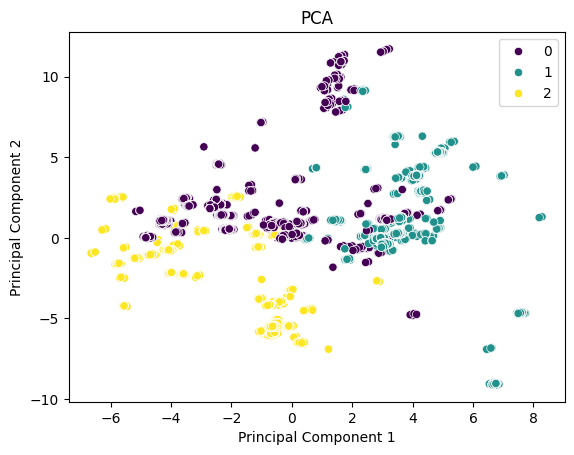

In [95]:
sns.scatterplot(
    x=transformed_data[:, 0], #Учитываем толькопервые две кмпоненты потому что они самые информативные
    y=transformed_data[:, 1],
    hue=labels,  # Указываем группы для цвета
    palette='viridis'  # Устанавливаем цветовую палитру (можно выбрать другую)
)
plt.title('PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

## T-SNE

In [96]:
# from sklearn.manifold import TSNE

In [97]:
# print(np.isnan(df_x).any())

In [98]:

# # Применение t-SNE
# tsne = TSNE(n_components=2)
# tsne_result = tsne.fit_transform(X)

# # Создаем новое окно графика
# plt.figure(figsize=(12, 6))

# # График для t-SNE
# plt.subplot(1, 2, 2)
# plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=y, cmap='viridis', alpha=0.5)
# plt.title('t-SNE')
# plt.xlabel('t-SNE Component 1')
# plt.ylabel('t-SNE Component 2')
# plt.colorbar(label='gap')

# # Показываем графики
# plt.tight_layout()
# plt.show()

##Model training without log scale

In [99]:
# Получение значения из столбца 'gap' как целевой переменной y
y = df_normal['value_in_ug_ml']
# X = df_x  # просто нормализованные
X = df_normal.drop(columns=['value_in_ug_ml'], inplace=False) # нормализованные данные

In [100]:
# y
X

,standard_type,standard_units,target_organism,MaxEStateIndex,MinEStateIndex,MinAbsEStateIndex,qed,MolWt,MaxPartialCharge,MinPartialCharge,...,fr_pyridine,fr_quatN,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea
0,-5.013479,-3.209955,1.151782,0.296427,-0.714175,-1.050724,-0.246337,-0.271683,-1.720265,-0.981312,...,-0.186361,-0.012751,-0.031891,-0.060759,-0.009016,-0.022992,-0.077159,-0.01008,-0.366231,-0.021752
1,-5.013479,-3.209955,1.481298,0.296427,-0.714175,-1.050724,-0.246337,-0.271683,-1.720265,-0.981312,...,-0.186361,-0.012751,-0.031891,-0.060759,-0.009016,-0.022992,-0.077159,-0.01008,-0.366231,-0.021752
2,-0.177325,-3.209955,-0.792362,0.296427,-0.714175,-1.050724,-0.246337,-0.271683,-1.720265,-0.981312,...,-0.186361,-0.012751,-0.031891,-0.060759,-0.009016,-0.022992,-0.077159,-0.01008,-0.366231,-0.021752
3,-0.177325,-3.209955,-0.495797,0.296427,-0.714175,-1.050724,-0.246337,-0.271683,-1.720265,-0.981312,...,-0.186361,-0.012751,-0.031891,-0.060759,-0.009016,-0.022992,-0.077159,-0.01008,-0.366231,-0.021752
4,-0.177325,-3.209955,0.624557,0.296427,-0.714175,-1.050724,-0.246337,-0.271683,-1.720265,-0.981312,...,-0.186361,-0.012751,-0.031891,-0.060759,-0.009016,-0.022992,-0.077159,-0.01008,-0.366231,-0.021752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49206,-0.177325,0.269012,0.855218,0.288094,-0.377075,-0.885993,0.122450,-0.385962,-1.720265,-0.981312,...,-0.186361,-0.012751,-0.031891,-0.060759,-0.009016,-0.022992,-0.077159,-0.01008,-0.366231,-0.021752
49207,-0.177325,0.269012,0.888170,0.288094,-0.377075,-0.885993,0.122450,-0.385962,-1.720265,-0.981312,...,-0.186361,-0.012751,-0.031891,-0.060759,-0.009016,-0.022992,-0.077159,-0.01008,-0.366231,-0.021752
49208,-0.177325,0.269012,1.415395,0.288094,-0.377075,-0.885993,0.122450,-0.385962,-1.720265,-0.981312,...,-0.186361,-0.012751,-0.031891,-0.060759,-0.009016,-0.022992,-0.077159,-0.01008,-0.366231,-0.021752
49209,-0.177325,0.269012,-1.780909,0.288094,-0.377075,-0.885993,0.122450,-0.385962,-1.720265,-0.981312,...,-0.186361,-0.012751,-0.031891,-0.060759,-0.009016,-0.022992,-0.077159,-0.01008,-0.366231,-0.021752


In [ ]:
# import lazypredict
# from lazypredict.Supervised import LazyRegressor  # Если регрессия
# from sklearn.model_selection import train_test_split
# import pandas as pd

# # Разделение на train/test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Используем LazyPredict
# reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
# models, predictions = reg.fit(X_train, X_test, y_train, y_test)

# # Выводим топ-3 моделей
# print(models.head(3))

 19%|█▉        | 8/42 [00:33<02:22,  4.19s/it]


KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import train_test_split

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

from catboost import CatBoostRegressor

import xgboost as xg
import lightgbm as lgb
# Список моделей
best_params = {
    'depth': 6,
    'learning_rate': 0.05206538586090059,
    'n_estimators': 986,
    'min_child_samples': 8,
    'subsample': 0.660278813040351,
    'colsample_bylevel': 0.8905506554944481,
    'l2_leaf_reg': 6.015238186884968,
    'random_strength': 0.5023567815905859,
    'verbose': 0
}
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost":  xg.XGBRegressor(n_estimators=100, random_state=42),
    "LightGBM": lgb.LGBMRegressor(metric='rmse'),
    "Catboost": CatBoostRegressor(**best_params)
}

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from catboost import CatBoostRegressor

# Глобальная переменная для хранения результатов
global_results = pd.DataFrame()

def evaluate_models(models, df_x, df_y, selected_model_name=None, n_splits=10):
    """
    Оценка модели или всех моделей с помощью KFold кросс-валидации.

    :param models: словарь {имя_модели: объект_модели}
    :param df_x: признаки (pandas.DataFrame)
    :param df_y: целевая переменная (pandas.Series)
    :param selected_model_name: строка с именем модели, которую нужно применить (если None, то выбираются все)
    :param n_splits: количество фолдов в кросс-валидации
    :return: pandas.DataFrame с накопленными результатами
    """
    global global_results  # Используем глобальный DataFrame для сохранения данных

    cv = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    results = []  # Локальный список для текущего запуска

    # Если выбрана конкретная модель, используем только её
    if selected_model_name:
        if selected_model_name in models:
            model_name = selected_model_name
            model = models[selected_model_name]
        else:
            print(f"Ошибка: модель '{selected_model_name}' не найдена в списке.")
            return global_results
        models = {model_name: model}  # Приводим к тому же формату, что и список моделей

    multiple_models = len(models) > 1  # Проверяем, сколько моделей передано

    # Функция для обработки одной модели
    def process_model(model_name, model):
        train_R2_scores, train_mse_scores, train_mae_scores = [], [], []
        test_R2_scores, test_mse_scores, test_mae_scores = [], [], []

        # Перебор фолдов
        for train_indices, test_indices in cv.split(df_x):
            x_train, x_test = df_x.iloc[train_indices], df_x.iloc[test_indices]
            y_train, y_test = df_y.iloc[train_indices], df_y.iloc[test_indices]

            # Обучение модели
            model.fit(x_train, y_train)

            # Предсказания
            train_preds = model.predict(x_train)
            test_preds = model.predict(x_test)

            # Сохранение метрик
            train_R2_scores.append(r2_score(y_train, train_preds))
            train_mse_scores.append(mean_squared_error(y_train, train_preds))
            train_mae_scores.append(mean_absolute_error(y_train, train_preds))

            test_R2_scores.append(r2_score(y_test, test_preds))
            test_mse_scores.append(mean_squared_error(y_test, test_preds))
            test_mae_scores.append(mean_absolute_error(y_test, test_preds))

        # Усреднение результатов по фолдам
        avg_train_R2 = np.mean(train_R2_scores)
        avg_train_MSE = np.mean(train_mse_scores)
        avg_train_MAE = np.mean(train_mae_scores)
        avg_test_R2 = np.mean(test_R2_scores)
        avg_test_MSE = np.mean(test_mse_scores)
        avg_test_MAE = np.mean(test_mae_scores)

        # Вывод результатов для текущей модели
        print(f"\nModel: {model_name}")
        print("Train dataset:")
        print(f"  R²: {avg_train_R2:.4f}")
        print(f"  MAE: {avg_train_MAE:.4f}")
        print(f"  MSE: {avg_train_MSE:.4f}")
        print(f"  RMSE: {np.sqrt(avg_train_MSE):.4f}")

        print("Test dataset:")
        print(f"  10-fold CV R²: {avg_test_R2:.4f}")
        print(f"  10-fold CV MAE: {avg_test_MAE:.4f}")
        print(f"  10-fold CV MSE: {avg_test_MSE:.4f}")
        print(f"  10-fold CV RMSE: {np.sqrt(avg_test_MSE):.4f}")

        # Добавление в список результатов
        results.append({
            'Model': model_name,
            'Train R²': avg_train_R2,
            'Train RMSE': np.sqrt(avg_train_MSE),
            'Train MSE': avg_train_MSE,
            'Test R²': avg_test_R2,
            'Test RMSE': np.sqrt(avg_test_MSE),
            'Test MSE': avg_test_MSE
        })

    # Запускаем обработку модели (или нескольких моделей)
    if multiple_models:
        for model_name, model in models.items():
            process_model(model_name, model)
    else:
        model_name, model = next(iter(models.items()))  # Получаем единственную модель
        process_model(model_name, model)

    # Преобразуем в DataFrame
    new_results_df = pd.DataFrame(results)

    # Если global_results уже существует, добавляем новые строки
    if not global_results.empty:
        global_results = pd.concat([global_results, new_results_df], ignore_index=True)
    else:
        global_results = new_results_df

    # Сортируем по Test R²
    global_results = global_results.sort_values(by="Test R²", ascending=False)

    return global_results


In [ ]:
selected_model = "Linear Regression"
global_results = evaluate_models(models, X, y, selected_model_name=selected_model)


Model: Linear Regression
Train dataset:
  R²: 0.0658
  MAE: 5.6796
  MSE: 70.8160
  RMSE: 8.4152
Test dataset:
  10-fold CV R²: 0.0621
  10-fold CV MAE: 5.6907
  10-fold CV MSE: 71.0911
  10-fold CV RMSE: 8.4316


In [ ]:
selected_model = "Random Forest"
global_results = evaluate_models(models, X, y, selected_model_name=selected_model)


Model: Random Forest
Train dataset:
  R²: 0.3470
  MAE: 4.2388
  MSE: 49.4991
  RMSE: 7.0356
Test dataset:
  10-fold CV R²: 0.2387
  10-fold CV MAE: 4.6550
  10-fold CV MSE: 57.7017
  10-fold CV RMSE: 7.5962


In [ ]:
selected_model = "XGBoost"
global_results = evaluate_models(models, X, y, selected_model_name=selected_model)


Model: XGBoost
Train dataset:
  R²: 0.3038
  MAE: 4.5649
  MSE: 52.7746
  RMSE: 7.2646
Test dataset:
  10-fold CV R²: 0.2435
  10-fold CV MAE: 4.7806
  10-fold CV MSE: 57.3511
  10-fold CV RMSE: 7.5731


In [ ]:
selected_model = "LightGBM"
global_results = evaluate_models(models, X, y, selected_model_name=selected_model)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.036528 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5515
[LightGBM] [Info] Number of data points in the train set: 44289, number of used features: 84
[LightGBM] [Info] Start training from score 5.077911
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.036761 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5427
[LightGBM] [Info] Number of data points in the train set: 44290, number of used features: 84
[LightGBM] [Info] Start training from score 5.063382
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024726 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

In [ ]:
selected_model = "Catboost"
global_results = evaluate_models(models, X, y, selected_model_name=selected_model)


Model: Catboost
Train dataset:
  R²: 0.2593
  MAE: 4.8108
  MSE: 56.1500
  RMSE: 7.4933
Test dataset:
  10-fold CV R²: 0.2274
  10-fold CV MAE: 4.9180
  10-fold CV MSE: 58.5708
  10-fold CV RMSE: 7.6532


In [ ]:
# global_results.drop(index=, inplace=True)
global_results

,Model,Train R²,Train RMSE,Train MSE,Test R²,Test RMSE,Test MSE
0,XGBoost,0.30,7.26,52.77,0.24,7.57,57.35
1,Random Forest,0.35,7.04,49.50,0.24,7.60,57.70
4,Catboost,0.26,7.49,56.15,0.23,7.65,58.57
2,LightGBM,0.26,7.50,56.18,0.23,7.65,58.59
3,Linear Regression,0.07,8.42,70.82,0.06,8.43,71.09


In [ ]:
global_results.to_csv('/content/drive/MyDrive/Susan_project/CSV_for_diploma/global_results.csv', index=False)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)
# Evaluate the model on the test set
y_pred_linear = model.predict(X_test)
r2 = r2_score(y_test, y_pred_linear)
mse = mean_squared_error(y_test, y_pred_linear)
rmse = np.sqrt(mse)
print("R2 score:", r2)
print("MSE:", mse)
print("RMSE:", rmse)


R2 score: 0.860330396914621 0.028095746856027642

Отображение перемнных в формате values или без него не имеет значения

In [ ]:
# # Создаем маску для значений, которые встречаются 100 раз или более
# mask = df_smlcode['standard_type'].isin(filtered_counts.index)

# # Фильтруем DataFrame, оставляя только те строки, которые соответствуют маске
# target_type_filt = df_smlcode[mask]
# # Выводим результат
# target_type_filt.reset_index(drop=True, inplace=True)
# display(target_type_filt)

Random Forest Regression in Python

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

warnings.filterwarnings('ignore')

In [ ]:
# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)

# Fit the regressor with x and y data
regressor.fit(X_train, y_train)

In [ ]:
# Evaluating the model
from sklearn.metrics import mean_squared_error, r2_score

# Access the OOB Score
oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

# Making predictions on the same data or new data
y_pred_RF = regressor.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred_RF)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, y_pred_RF)
print(f'R-squared: {r2}')
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

XGBoost

In [ ]:
# Necessary imports
import numpy as np
import pandas as pd
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE


# Instantiation
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 100, seed = 123)

# Fitting the model
xgb_r.fit(X_train, y_train)

# Predict the model
y_pred_XGB = xgb_r.predict(X_test)

# RMSE Computation
rmse = np.sqrt(MSE(y_test, y_pred_XGB))
print("RMSE : % f" %(rmse))
r3 = r2_score(y_test, y_pred_XGB)
print(f'R-squared: {r3}')
mse = mean_squared_error(y_test, y_pred_XGB)
print(f'Mean Squared Error: {mse}')

LIghtGBM


In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import lightgbm as lgb

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Import necessary libraries for calculating mean squared error and using the LightGBM regressor.
from sklearn.metrics import mean_squared_error as mse
from lightgbm import LGBMRegressor

# Create an instance of the LightGBM Regressor with the RMSE metric.
model = LGBMRegressor(metric='rmse')

# Train the model using the training data.
model.fit(X_train, y_train)

# Make predictions on the training and validation data.
y_pred_LIGHT = model.predict(X_test)

In [ ]:
# RMSE Computation
rmse = np.sqrt(MSE(y_test, y_pred_LIGHT))
print("RMSE : % f" %(rmse))
r3 = r2_score(y_test, y_pred_LIGHT)
print(f'R-squared: {r3}'
)
mse = mean_squared_error(y_test, y_pred_LIGHT)
print(f'Mean Squared Error: {mse}')

## Model Vsualization


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Проверяем, есть ли данные в global_results
if not global_results.empty:
    # Выбираем метрики для отображения
    metrics = ["Train R²", "Train RMSE", "Train MSE", "Test R²", "Test RMSE", "Test MSE"]
    x_labels = global_results["Model"]  # Модели на оси X

    # Задаем ширину столбцов и позиции
    x = np.arange(len(x_labels))
    width = 0.15  # Ширина столбцов

    # Создаем график
    fig, ax = plt.subplots(figsize=(12, 6))

    # Цвета для различных метрик
    colors = ["blue", "green", "red", "purple", "orange", "brown"]

    # Строим столбчатые графики для каждой метрики
    for i, metric in enumerate(metrics):
        ax.bar(x + i * width, global_results[metric], width=width, label=metric, color=colors[i])

    # Настройки графика
    ax.set_xlabel("Models")
    ax.set_ylabel("Metric Values")
    ax.set_title("Comparison of Model Metrics")
    ax.set_xticks(x + (len(metrics) * width) / 2 - width / 2)
    ax.set_xticklabels(x_labels, rotation=45, ha="right")
    ax.legend()

    plt.tight_layout()
    plt.show()
else:
    print("Нет данных в global_results для построения графика.")

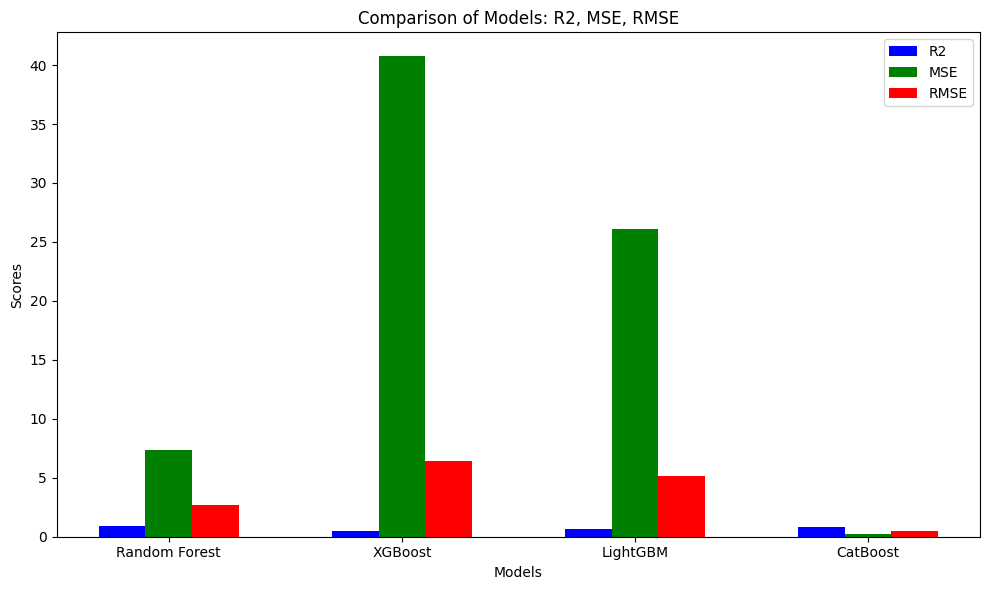

In [ ]:
# Примерные данные для метрик моделей
models = ['Random Forest','XGBoost', 'LightGBM','CatBoost']
r2_scores = [0.9056491159873721, 0.47916049807951966, 0.6664276649745897, 0.86]  # Примерные значения R2
mse_scores = [7.379867712586599, 40.738639217712, 26.091114363450682, 0.24]  # Примерные значения MSE
rmse_scores = np.sqrt(mse_scores)  # RMSE - корень из MSE

# Создание бар-чарта
x = np.arange(len(models))  # Местоположения по оси X
width = 0.2  # Ширина столбцов

fig, ax = plt.subplots(figsize=(10, 6))

# Столбцы для каждой метрики
ax.bar(x - width, r2_scores, width, label='R2', color='b')
ax.bar(x, mse_scores, width, label='MSE', color='g')
ax.bar(x + width, rmse_scores, width, label='RMSE', color='r')

# Настройка осей и подписи
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Models: R2, MSE, RMSE')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Показать график
plt.tight_layout()
plt.show()

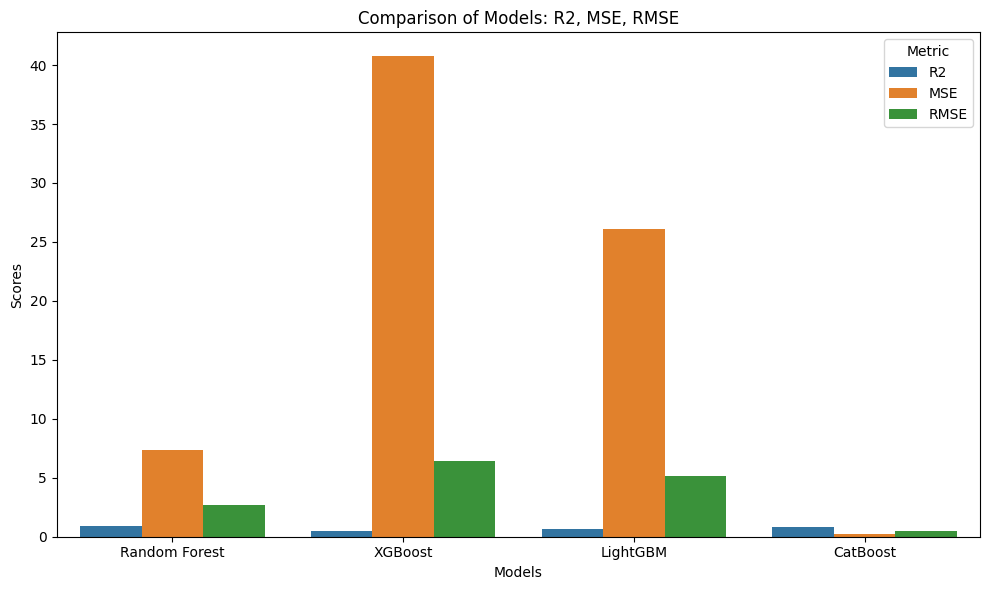

In [ ]:
# Примерные данные для метрик моделей
models = ['Random Forest','XGBoost', 'LightGBM','CatBoost']
r2_scores = [0.9056491159873721, 0.47916049807951966, 0.6664276649745897, 0.86]  # Примерные значения R2
mse_scores = [7.379867712586599, 40.738639217712, 26.091114363450682, 0.24]  # Примерные значения MSE
rmse_scores = [2.7165911934972105, 6.382683, 5.107946, 0.49]  # Примерные значения RMSE

# Создаем DataFrame для удобства
data = {
    'Model': models * 3,
    'Metric': ['R2'] * len(models) + ['MSE'] * len(models) + ['RMSE'] * len(models),
    'Score': r2_scores + mse_scores + rmse_scores
}

df = pd.DataFrame(data)
print(df)
# Создание графика с seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Score', hue='Metric', data=df)

# Настройка заголовков и подписей
plt.title('Comparison of Models: R2, MSE, RMSE')
plt.xlabel('Models')
plt.ylabel('Scores')

# Показать график
plt.tight_layout()
plt.show()

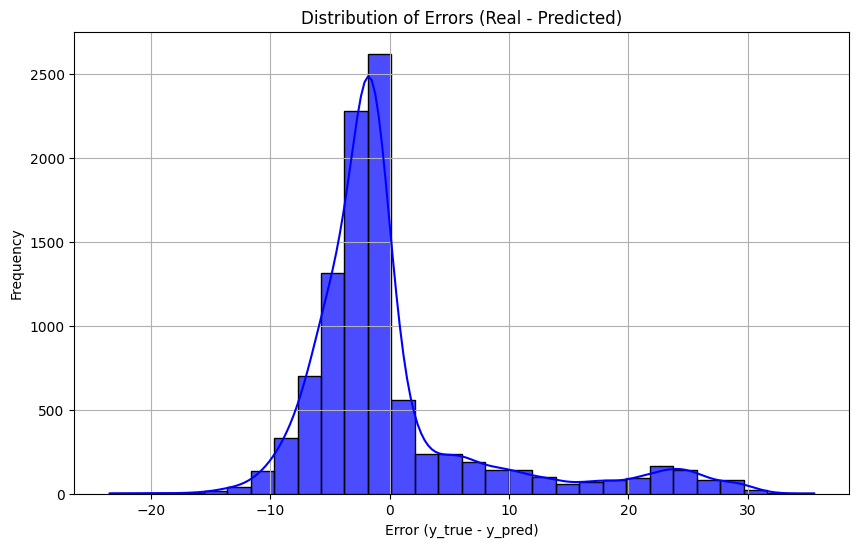

In [ ]:
import seaborn as sns
from sklearn.metrics import mean_squared_error

# Расчет ошибок
errors = y_test - y_pred_LIGHT

# Построение гистограммы ошибок
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True, bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Errors (Real - Predicted)')
plt.xlabel('Error (y_true - y_pred)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

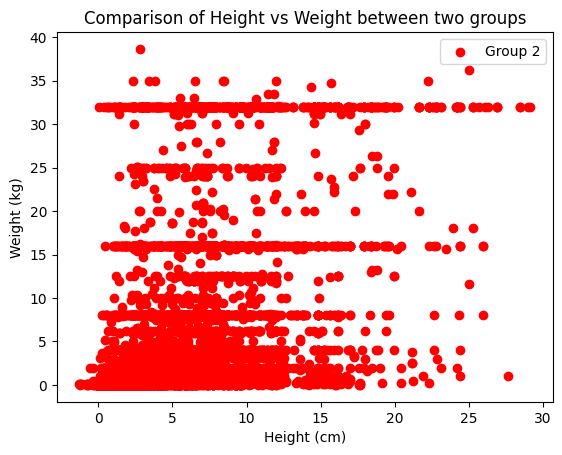

In [ ]:
# plt.scatter(y_pred_linear, y_test, color='blue', label='Group 1')
plt.scatter(y_pred_XGB, y_test, color='red', label='Group 2')

plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('Comparison of Height vs Weight between two groups')

plt.legend()
plt.show()

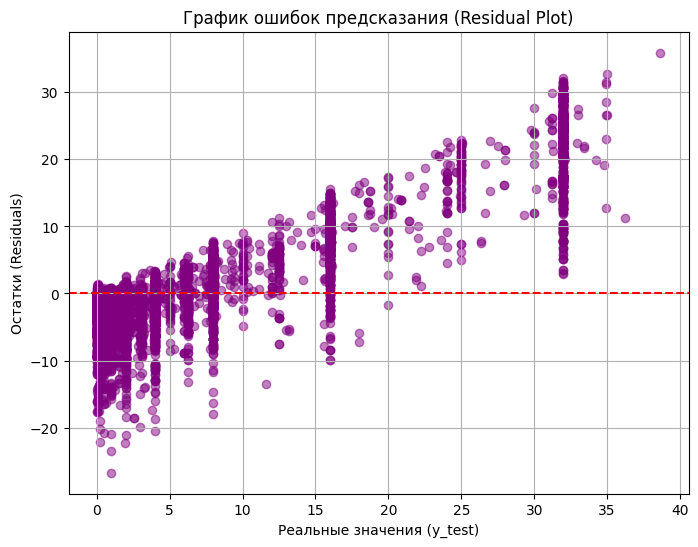

In [ ]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred_XGB

plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals, alpha=0.5, color='purple')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Реальные значения (y_test)")
plt.ylabel("Остатки (Residuals)")
plt.title("График ошибок предсказания (Residual Plot)")
plt.grid()
plt.show()

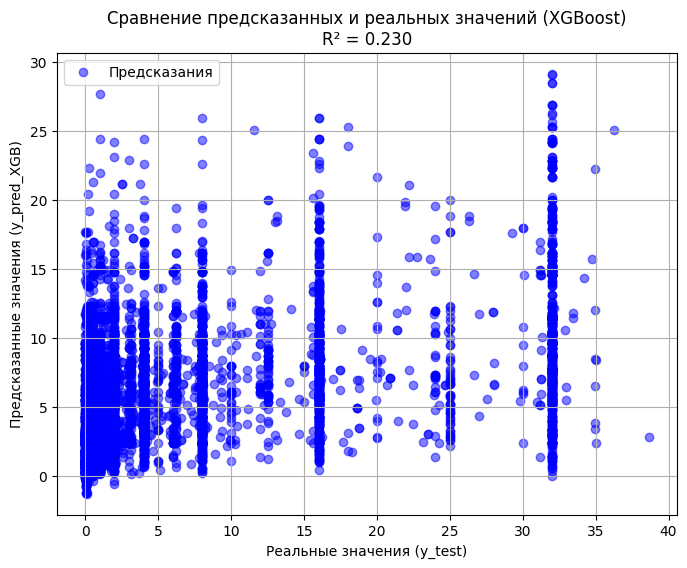

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred_XGB)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_XGB, color='blue', alpha=0.5, label="Предсказания")
# plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label="Идеальное предсказание")

plt.xlabel("Реальные значения (y_test)")
plt.ylabel("Предсказанные значения (y_pred_XGB)")
plt.title(f"Сравнение предсказанных и реальных значений (XGBoost)\nR² = {r2:.3f}")
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap

# Scatter Plot Function
def scatter_plot(y_train, y_train_preds, y_test, y_test_preds, title='Catboost Model', xlim=(-5, 11), ylim=(-5, 11), save_path='scatter_plot_catboost.png'):
    custom_params = {"axes.spines.right": False, "axes.spines.top": False}
    sns.set_theme(style="ticks", rc=custom_params)
    # sns.set(font_scale=2)

    f, ax = plt.subplots(figsize=(8, 8))
    plt.scatter(y_train, y_train_preds, color='#2d4d85', s=30, label='Train dataset', alpha=1)
    plt.scatter(y_test, y_test_preds, color='#951d6d', s=30, label='Test dataset', alpha=1)
    plt.plot(y_test_preds, y_test_preds, color='#444444', linewidth=2)

    # Customize axis
    plt.gca().spines['bottom'].set_color('black')
    plt.gca().spines['bottom'].set_linewidth(3)
    plt.gca().spines['left'].set_color('black')
    plt.gca().spines['left'].set_linewidth(3)

    plt.title(title)
    plt.xlabel('Actual data')
    plt.ylabel('Predicted data')
    plt.legend(loc='upper left')
    plt.xlim(xlim)
    plt.ylim(ylim)

    # Save the figure with transparency
    plt.savefig(save_path, transparent=True)
    plt.show()


# Feature Importance Plot Function
def feature_importance_plot(model, X_train, cols, title='Feature Importance', save_path='feature_importance.png'):
    feature_importance = model.feature_importances_
    feature_names = X_train.columns
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    custom_palette = sns.color_palette("Blues_r", n_colors=len(feature_importance_df))
    selected_feature_importance = feature_importance_df[feature_importance_df['Feature'].isin(cols)]

    sns.set(font_scale=2)
    # Plotting feature importance with custom color gradient
    plt.figure(figsize=(8, 8))
    sns.barplot(x='Importance', y='Feature', data=selected_feature_importance, palette=custom_palette)
    # plt.title(title)
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.tight_layout()

    # Save the plot
    plt.savefig(save_path, transparent=True)
    plt.show()

# SHAP Summary Plot Function
def shap_summary_plot(model, X_train, cols, save_path='shap_summary_plot.png'):
    X_importance = X_train
    selected_X_importance = X_importance[cols]
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_importance)
    selected_shap_values = shap_values[:, X_importance.columns.isin(cols)]

    # Create the SHAP summary plot
    shap.summary_plot(selected_shap_values, selected_X_importance, show=False)
    plt.gcf().set_size_inches(6, 6)
    plt.tight_layout()  # Ensures plots are properly arranged

    plt.savefig(save_path, transparent=True)
    plt.show()

# def shap_summary_plot(model, X_train, cols, save_path='shap_summary_plot.png', top_n=5):
#     X_importance = X_train
#     selected_X_importance = X_importance[cols]
#     explainer = shap.TreeExplainer(model)
#     shap_values = explainer.shap_values(X_importance)
#     selected_shap_values = shap_values[:, X_importance.columns.isin(cols)]
#
#     # Compute mean absolute SHAP values for each feature
#     mean_abs_shap = np.mean(np.abs(selected_shap_values), axis=0)
#
#     # Get indices of top N features
#     top_indices = np.argsort(mean_abs_shap)[-top_n:]
#
#     # Select only the top N features
#     top_selected_shap_values = selected_shap_values[:, top_indices]
#     top_selected_X_importance = selected_X_importance.iloc[:, top_indices]
#
#     # Create the SHAP summary plot
#     shap.summary_plot(top_selected_shap_values, top_selected_X_importance, show=False)
#     plt.gcf().set_size_inches(8, 8)
#     plt.tight_layout()  # Ensures plots are properly arranged
#
#     plt.savefig(save_path, transparent=True)
#     plt.show()
#


##LOG scale for y

In [ ]:
# Calculating logarithmic values for the specified column
y_log = np.log(transformed_df['value_in_ug_ml'])
# y = transformed_df['value_in_ug_ml'].apply(lambda x: log(x))

# Displaying the resulting dataframe
print(y_log)

# # Получение значения из столбца 'gap' как целевой переменной y
# y = np.log10(transformed_df['value_in_ug_ml'].values)
# # X = df_x  # просто нормализованные
# X = transformed_df.drop(columns=['value_in_ug_ml'], inplace=False).values  # нормализованные данные

0        0.760333
1       -1.202531
2        1.757834
3        1.757834
4        1.757834
           ...   
49206    1.609438
49207    1.609438
49208    1.609438
49209    1.609438
49210    1.609438
Name: value_in_ug_ml, Length: 49211, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

warnings.filterwarnings('ignore')

In [ ]:
# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)

# Fit the regressor with x and y data
regressor.fit(X_train, y_train)

In [ ]:
# Evaluating the model
from sklearn.metrics import mean_squared_error, r2_score

# Access the OOB Score
oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

# Making predictions on the same data or new data
y_pred_RF = regressor.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred_RF)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, y_pred_RF)
print(f'R-squared: {r2}')
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')